# About Dataset

# Descripton and Background Data

- **Context**
"Trips & Travel.Com" company wants to enable and establish a viable business model to expand the customer base. One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages. However, the marketing cost was quite high because customers were contacted at random without looking at the available information. The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being. However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

- **Content**
What's inside is more than just rows and columns. Make it easy for others to get started by describing how you acquired the data and what time period it represents, too.
- Most important features that have an impact on Product taken: Designation, Passport, Tier City, Martial status, occupation
- Customers with Designation as Executive should be the target customers for the company .Customers who have passport and are from tier 3 city and are single or unmarried, have large business such customers have higher chances of taking new package.
- Customers monthly income in range of 15000- 25000, and age range 15-30, prefer 5 star properties also have higher chances of taking new package based on EDA.

- **Inspiration**
We need to analyze the customers' data and information to provide recommendations to the Policy Maker and Marketing Team and also build a model to predict the potential customer who is going to purchase the newly introduced travel package.

- **Tasks to Solve** :
- To predict which customer is more likely to purchase the newly introduced travel package
- Which variables are most significant.
- Which segment of customers should be targeted more.

**About this file** 

"Travel.Com" company wants to enable and establish a viable business model to expand the customer base. One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages. However, the marketing cost was quite high because customers were contacted at random without looking at the available information. The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

We need to analyze the customers' data and information to provide recommendations to the Policy Maker and Marketing Team and also build a model to predict the potential customer who is going to purchase the newly introduced travel package.

1. CustomerID
Unique customer ID
2. ProdTaken
Unique customer ID
3. Age
Age of customer
4. TypeofContact
How customer was contacted (Company Invited or Self Inquiry)
5. CityTier
City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3
6. DurationOfPitch
Duration of the pitch by a salesperson to the customer
7. Occupation
Occupation of customer
8. Gender
Gender of customer
9. NumberOfPersonVisiting
Total number of persons planning to take the trip with the customer
10. NumberOfFollowups
Total number of follow-ups has been done by the salesperson after the sales pitch
11. ProductPitched
Product pitched by the salesperson
12. PreferredPropertyStar
Preferred hotel property rating by customer
13. MaritalStatus
Marital status of customer
14. NumberOfTrips
Average number of trips in a year by customer
15. Passport
The customer has a passport or not (0: No, 1: Yes)
16. PitchSatisfactionScore
Sales pitch satisfaction score
17. OwnCar
Whether the customers own a car or not (0: No, 1: Yes)
18. NumberOfChildrenVisiting
Total number of children with age less than 5 planning to take the trip with the customer
19. Designation
Designation of the customer in the current organization
20. MonthlyIncome
Gross monthly income of the customer

## Import Library and Dataset

In [82]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.ticker as mtick
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.pipeline import Pipeline
from scipy.stats import chi2_contingency
from sklearn.feature_selection import f_classif
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.decomposition import PCA
%matplotlib inline


print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.24.3
pandas version :  1.5.3
seaborn version :  0.12.2


In [83]:
df = pd.read_csv('Travel.csv')

In [84]:
df.head(5)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [85]:
df.shape

(4888, 20)

## Descriptive Statistics

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [87]:
nums = df.select_dtypes(include=np.number).columns
cats = df.select_dtypes(exclude=np.number).columns

In [88]:
df[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.00,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0


In [89]:
df[cats].describe()

,TypeofContact,Occupation,Gender,ProductPitched,MaritalStatus,Designation
count,4863,4888,4888,4888,4888,4888
unique,2,4,3,5,4,5
top,Self Enquiry,Salaried,Male,Basic,Married,Executive
freq,3444,2368,2916,1842,2340,1842


## Handling Missing Values

### Check Null

In [90]:
miss_cols = df.columns[df.isnull().any()]
missing_df = df[miss_cols].isnull().sum()
print(missing_df)

Age                         226
TypeofContact                25
DurationOfPitch             251
NumberOfFollowups            45
PreferredPropertyStar        26
NumberOfTrips               140
NumberOfChildrenVisiting     66
MonthlyIncome               233
dtype: int64


In [91]:
df.isna().sum()
for i in df.columns:
    print(f'Missing value pada kolom {i} sebanyak {(df[i].isna().sum())}, dengan persentase {round(((df[i].isna().sum())/(len(df))*100),2)}%')

Missing value pada kolom CustomerID sebanyak 0, dengan persentase 0.0%
Missing value pada kolom ProdTaken sebanyak 0, dengan persentase 0.0%
Missing value pada kolom Age sebanyak 226, dengan persentase 4.62%
Missing value pada kolom TypeofContact sebanyak 25, dengan persentase 0.51%
Missing value pada kolom CityTier sebanyak 0, dengan persentase 0.0%
Missing value pada kolom DurationOfPitch sebanyak 251, dengan persentase 5.14%
Missing value pada kolom Occupation sebanyak 0, dengan persentase 0.0%
Missing value pada kolom Gender sebanyak 0, dengan persentase 0.0%
Missing value pada kolom NumberOfPersonVisiting sebanyak 0, dengan persentase 0.0%
Missing value pada kolom NumberOfFollowups sebanyak 45, dengan persentase 0.92%
Missing value pada kolom ProductPitched sebanyak 0, dengan persentase 0.0%
Missing value pada kolom PreferredPropertyStar sebanyak 26, dengan persentase 0.53%
Missing value pada kolom MaritalStatus sebanyak 0, dengan persentase 0.0%
Missing value pada kolom NumberOfT

### Check double space

In [92]:
# Loop untuk setiap kolom dalam DataFrame
for column in df.columns:
    # Mengecek jumlah nilai yang hanya terdiri dari spasi ganda di setiap kolom
    spasi_ganda_check = (df[column].astype(str).str.strip() == '').sum()
    
    # Mencetak hasil jika terdapat nilai spasi ganda di suatu kolom
    if spasi_ganda_check > 0:
        print(f"Kolom '{column}' memiliki {spasi_ganda_check} nilai yang hanya spasi ganda.")
    else:
        print(f"Tidak ada nilai yang hanya spasi ganda di kolom '{column}'.")

Tidak ada nilai yang hanya spasi ganda di kolom 'CustomerID'.
Tidak ada nilai yang hanya spasi ganda di kolom 'ProdTaken'.
Tidak ada nilai yang hanya spasi ganda di kolom 'Age'.
Tidak ada nilai yang hanya spasi ganda di kolom 'TypeofContact'.
Tidak ada nilai yang hanya spasi ganda di kolom 'CityTier'.
Tidak ada nilai yang hanya spasi ganda di kolom 'DurationOfPitch'.
Tidak ada nilai yang hanya spasi ganda di kolom 'Occupation'.
Tidak ada nilai yang hanya spasi ganda di kolom 'Gender'.
Tidak ada nilai yang hanya spasi ganda di kolom 'NumberOfPersonVisiting'.
Tidak ada nilai yang hanya spasi ganda di kolom 'NumberOfFollowups'.
Tidak ada nilai yang hanya spasi ganda di kolom 'ProductPitched'.
Tidak ada nilai yang hanya spasi ganda di kolom 'PreferredPropertyStar'.
Tidak ada nilai yang hanya spasi ganda di kolom 'MaritalStatus'.
Tidak ada nilai yang hanya spasi ganda di kolom 'NumberOfTrips'.
Tidak ada nilai yang hanya spasi ganda di kolom 'Passport'.
Tidak ada nilai yang hanya spasi ganda

In [93]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df.dropna(subset=['TypeofContact'], inplace=True)
df['DurationOfPitch'].fillna(df['DurationOfPitch'].median(), inplace=True)
df['NumberOfFollowups'].fillna(0, inplace=True)
df['PreferredPropertyStar'].fillna(3, inplace=True)
df['NumberOfTrips'].fillna(df['NumberOfTrips'].median(), inplace=True)
df['NumberOfChildrenVisiting'].fillna(0, inplace=True)
df['MonthlyIncome'].fillna(df['MonthlyIncome'].median(), inplace=True)

In [94]:
print('Apakah masih ada nilai null?', df.isnull().any().any())

Apakah masih ada nilai null? False


### Handling Irregular Data

In [95]:
pd.set_option('display.max_rows', 5000)
for i in df.columns:
    if i not in 'CustomerID':
        print(f'''Value count kolom {i}:''')
        print(df[i].value_counts())
        print()

Value count kolom ProdTaken:
0    3946
1     917
Name: ProdTaken, dtype: int64

Value count kolom Age:
35.000000    237
36.000000    230
37.622265    226
34.000000    208
31.000000    201
30.000000    199
32.000000    195
33.000000    188
37.000000    185
29.000000    176
38.000000    176
41.000000    154
39.000000    150
40.000000    146
28.000000    145
42.000000    142
27.000000    136
43.000000    130
46.000000    121
45.000000    115
44.000000    105
26.000000    102
51.000000     90
47.000000     88
50.000000     86
25.000000     73
52.000000     68
53.000000     66
49.000000     65
48.000000     65
55.000000     64
54.000000     61
56.000000     58
24.000000     53
23.000000     46
22.000000     46
59.000000     44
21.000000     41
20.000000     38
19.000000     32
58.000000     31
57.000000     29
60.000000     29
18.000000     14
61.000000      9
Name: Age, dtype: int64

Value count kolom TypeofContact:
Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype

Diketahui bahwa ada ketidakkonsistenan pada feature gerder(Fe Male), dan maritalstatus(Singe dengan unmaried yang memiliki definisi sama)

In [96]:
df['Gender'] = df['Gender'].replace('Fe Male', 'Female')
df['MaritalStatus'] = df['MaritalStatus'].replace('Single', 'Unmarried')

handled = ['Gender', 'MaritalStatus']
for i in handled:
    print(f'''Value count kolom {i}:''')
    print(df[i].value_counts())
    print()

Value count kolom Gender:
Male      2901
Female    1962
Name: Gender, dtype: int64

Value count kolom MaritalStatus:
Married      2325
Unmarried    1594
Divorced      944
Name: MaritalStatus, dtype: int64



### Check Duplicate

In [97]:
print('There is',df.duplicated().sum(),'duplicated value')

There is 0 duplicated value


# Explatory Data Analysis

In [98]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]
    
    
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'num_cols: {len(num_cols)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    print(f'cat_cols: {len(cat_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')

    return num_cols, num_but_cat, cat_cols, cat_but_car

In [99]:
num_cols, num_but_cat, cat_cols, cat_but_car  = grab_col_names(df)

Observations: 4863
Variables: 20
num_cols: 5
num_but_cat: 9
cat_cols: 15
cat_but_car: 0


Terdapat 4888 observasi (baris) dan 20 variabel (kolom) dalam dataframe.
Dari 20 variabel tersebut:
15 di antaranya adalah kategorikal.
5 adalah numerik.
Tidak ada kolom yang tergolong sebagai kategorikal yang seharusnya numerik (cat_but_car).
Ada 9 kolom numerik yang memiliki jumlah nilai unik kurang dari batas ambang 10 dan seharusnya kategorikal (num_but_cat).

In [100]:
num_cols.remove('CustomerID')
num_cols

['Age', 'DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome']

In [101]:
num_but_cat

['ProdTaken',
 'CityTier',
 'NumberOfPersonVisiting',
 'NumberOfFollowups',
 'PreferredPropertyStar',
 'Passport',
 'PitchSatisfactionScore',
 'OwnCar',
 'NumberOfChildrenVisiting']

In [102]:
cat_cols = [col for col in cat_cols if col not in num_but_cat]
cat_cols

['TypeofContact',
 'Occupation',
 'Gender',
 'ProductPitched',
 'MaritalStatus',
 'Designation']

## Univariate Analysis

### Target (ProdTaken)

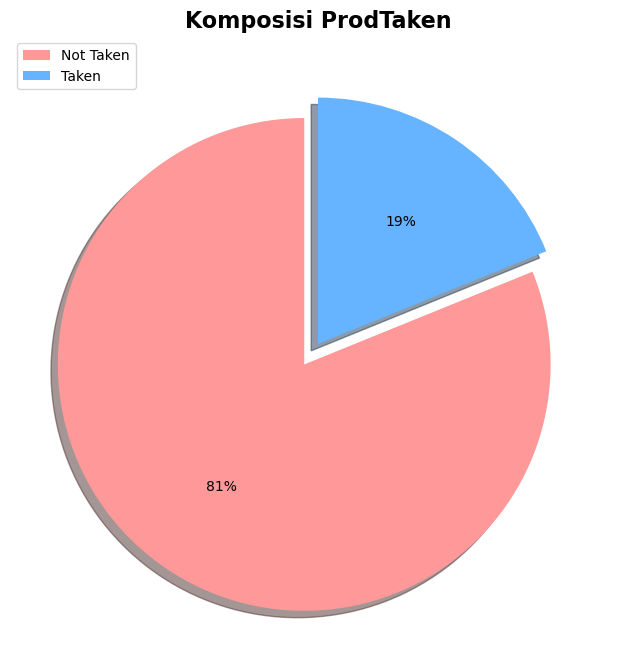

In [103]:
plt.figure(figsize=(8, 8))

# Data
target_counts = df['ProdTaken'].value_counts()

# Mengatur variasi warna dan efek shadow
colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0)

# Pie chart
plt.pie(target_counts, autopct='%1.0f%%', startangle=90, explode=explode, colors=colors, shadow=True)

# Pengaturan lainnya
plt.title('Komposisi ProdTaken', fontsize=16, fontweight='bold')
plt.legend(labels=['Not Taken', 'Taken'], loc='upper left')

plt.show()

### Numerical

<Figure size 640x480 with 0 Axes>

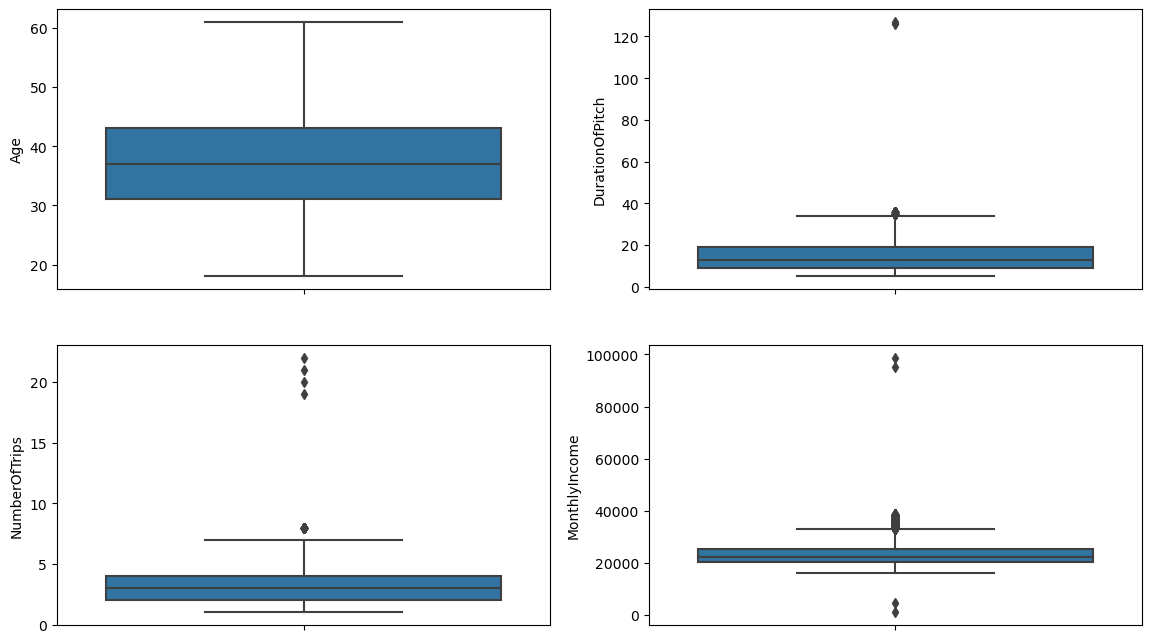

In [104]:
plt.suptitle('Univariate Analysis of Numerical Columns', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
plt.tight_layout()
plt.figure(figsize=(14, 8)) 
for i, col in enumerate(num_cols):
    plt.subplot(2, 2, i+1)
    sns.boxplot(y=df[col])
    plt.ylabel(col)
plt.show()

<Figure size 640x480 with 0 Axes>

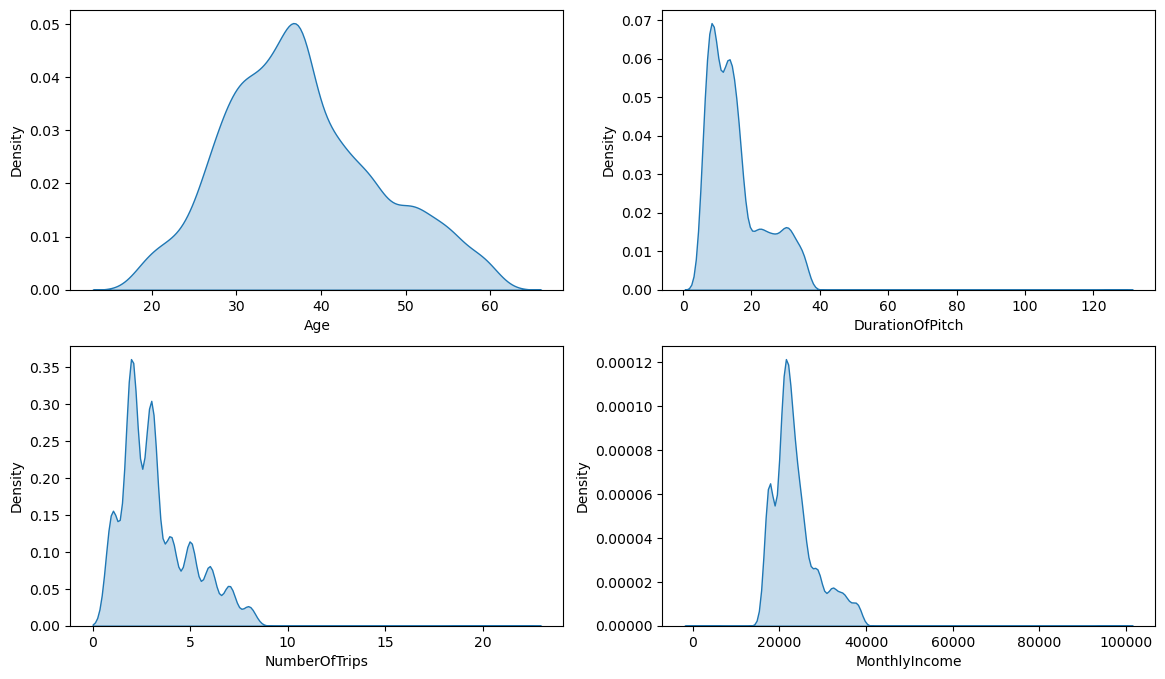

In [105]:
plt.suptitle('Univariate Analysis of Numerical Columns', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
plt.tight_layout()
plt.figure(figsize=(14, 8)) 
for i, col in enumerate(num_cols):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(data=df[col], shade=True)
    plt.xlabel(col)
plt.show()

In [106]:
# Check tingkat kemiringan distribusi data numerik dengan skewness score
for i in range(0, len(num_cols)):
    print(f"Skewness {df[num_cols].columns[i]} : {df[num_cols[i]].skew()}")

Skewness Age : 0.3874642234419638
Skewness DurationOfPitch : 1.8239971172005123
Skewness NumberOfTrips : 1.4886426162658026
Skewness MonthlyIncome : 2.0154701506652453


Kesimpulan:

- Kolom CustomerID memiliki sebaran data yang terlalu banyak sehingga kolom tersebut bisa dihapus nantinya.
- Kolom Age memiliki distribusi yang hampir normal.
- Kolom DurationOfPitch, NumberOfTrips, dan MonthlyIncome sepertinya memiliki distribusi data positive skewed yang mengindikasikan terdapat outlier.
- kolom lain yang sisanya termasuk jenis data diskrit atau ordinal.

### Numerical but Categorical

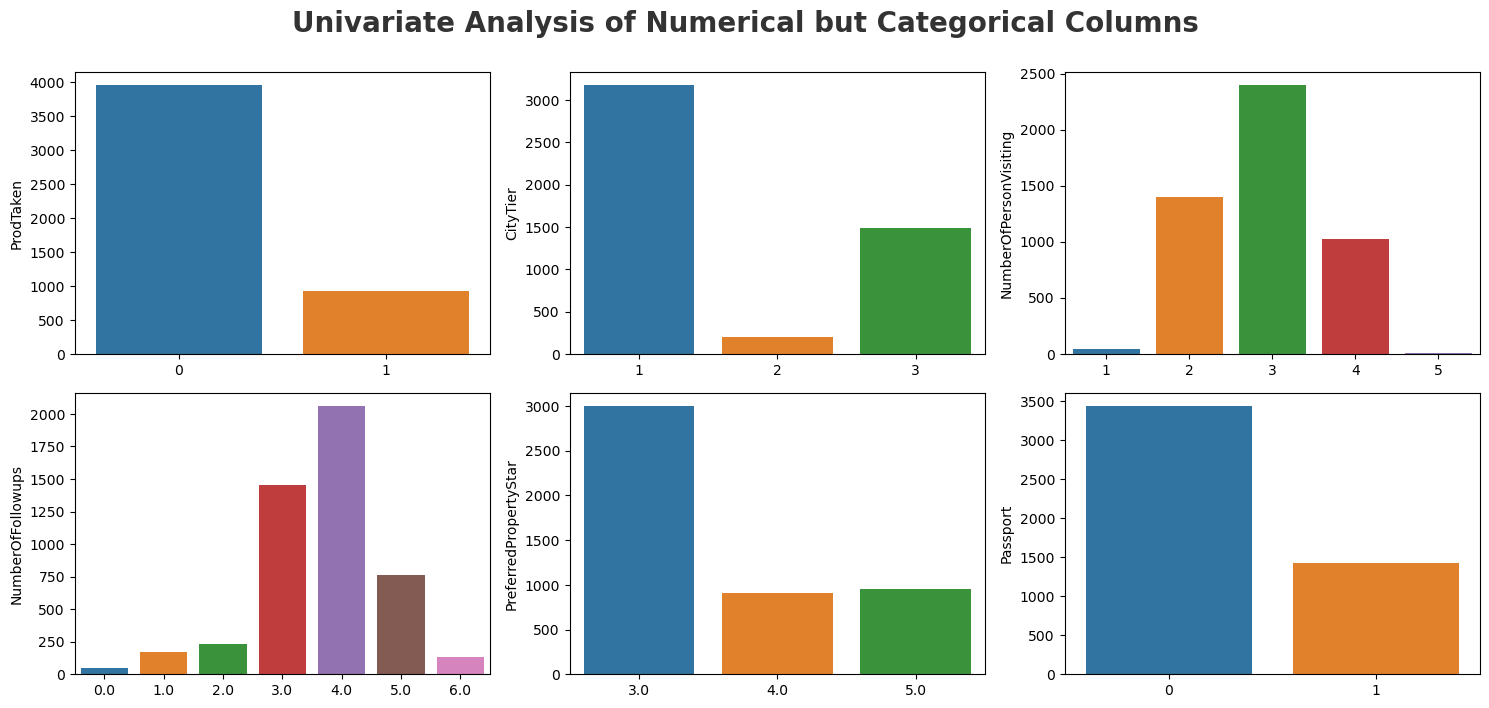

In [107]:
plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Numerical but Categorical Columns', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(cat_cols)):
    plt.subplot(3, 3, i+1)
    sns.barplot(x=df[num_but_cat[i]].value_counts().index, y=df[num_but_cat[i]].value_counts())

plt.tight_layout()
plt.show()

### Categorical

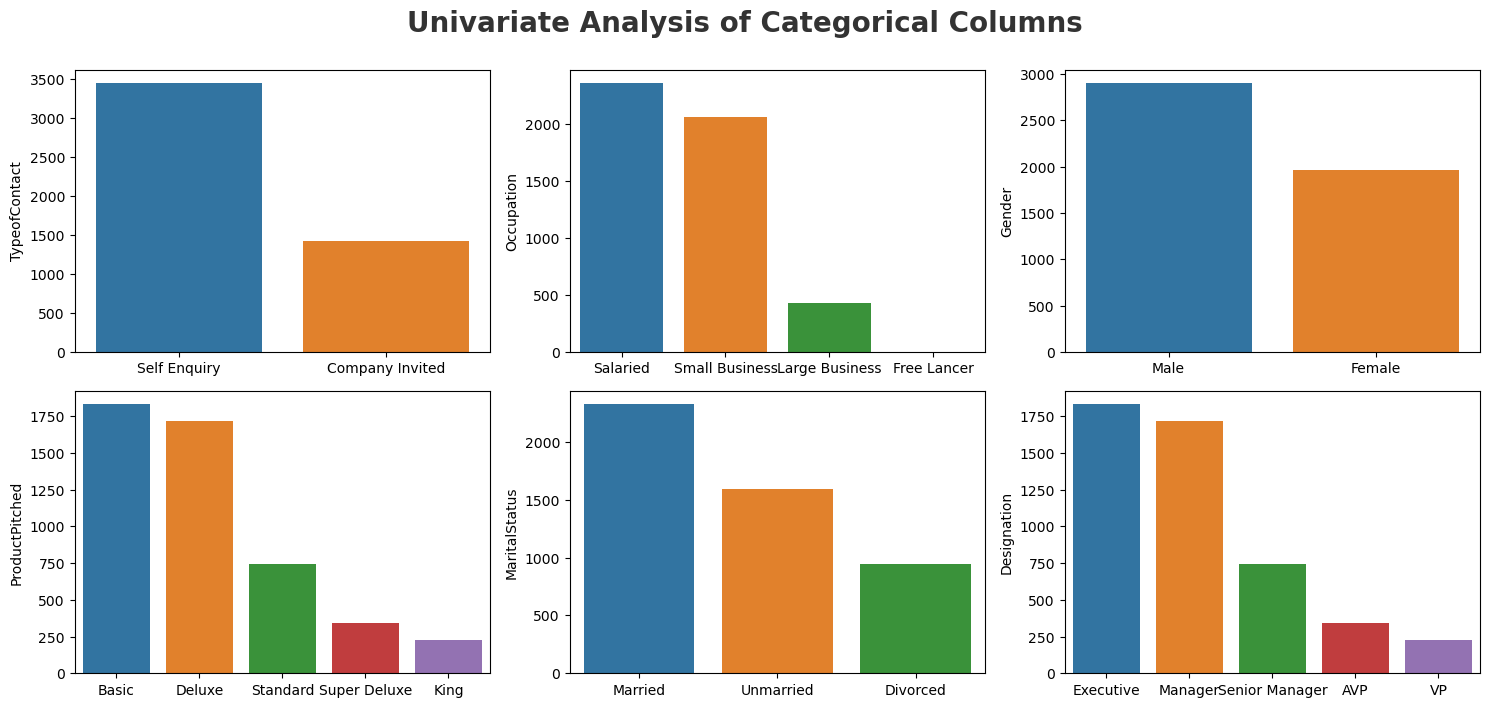

In [108]:
plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Categorical Columns', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(cat_cols)):
    plt.subplot(3, 3, i+1)
    sns.barplot(x=df[cat_cols[i]].value_counts().index, y=df[cat_cols[i]].value_counts())

plt.tight_layout()
plt.show()

## Bivariate Analysis

### Numerical Columns Vs ProdTaken

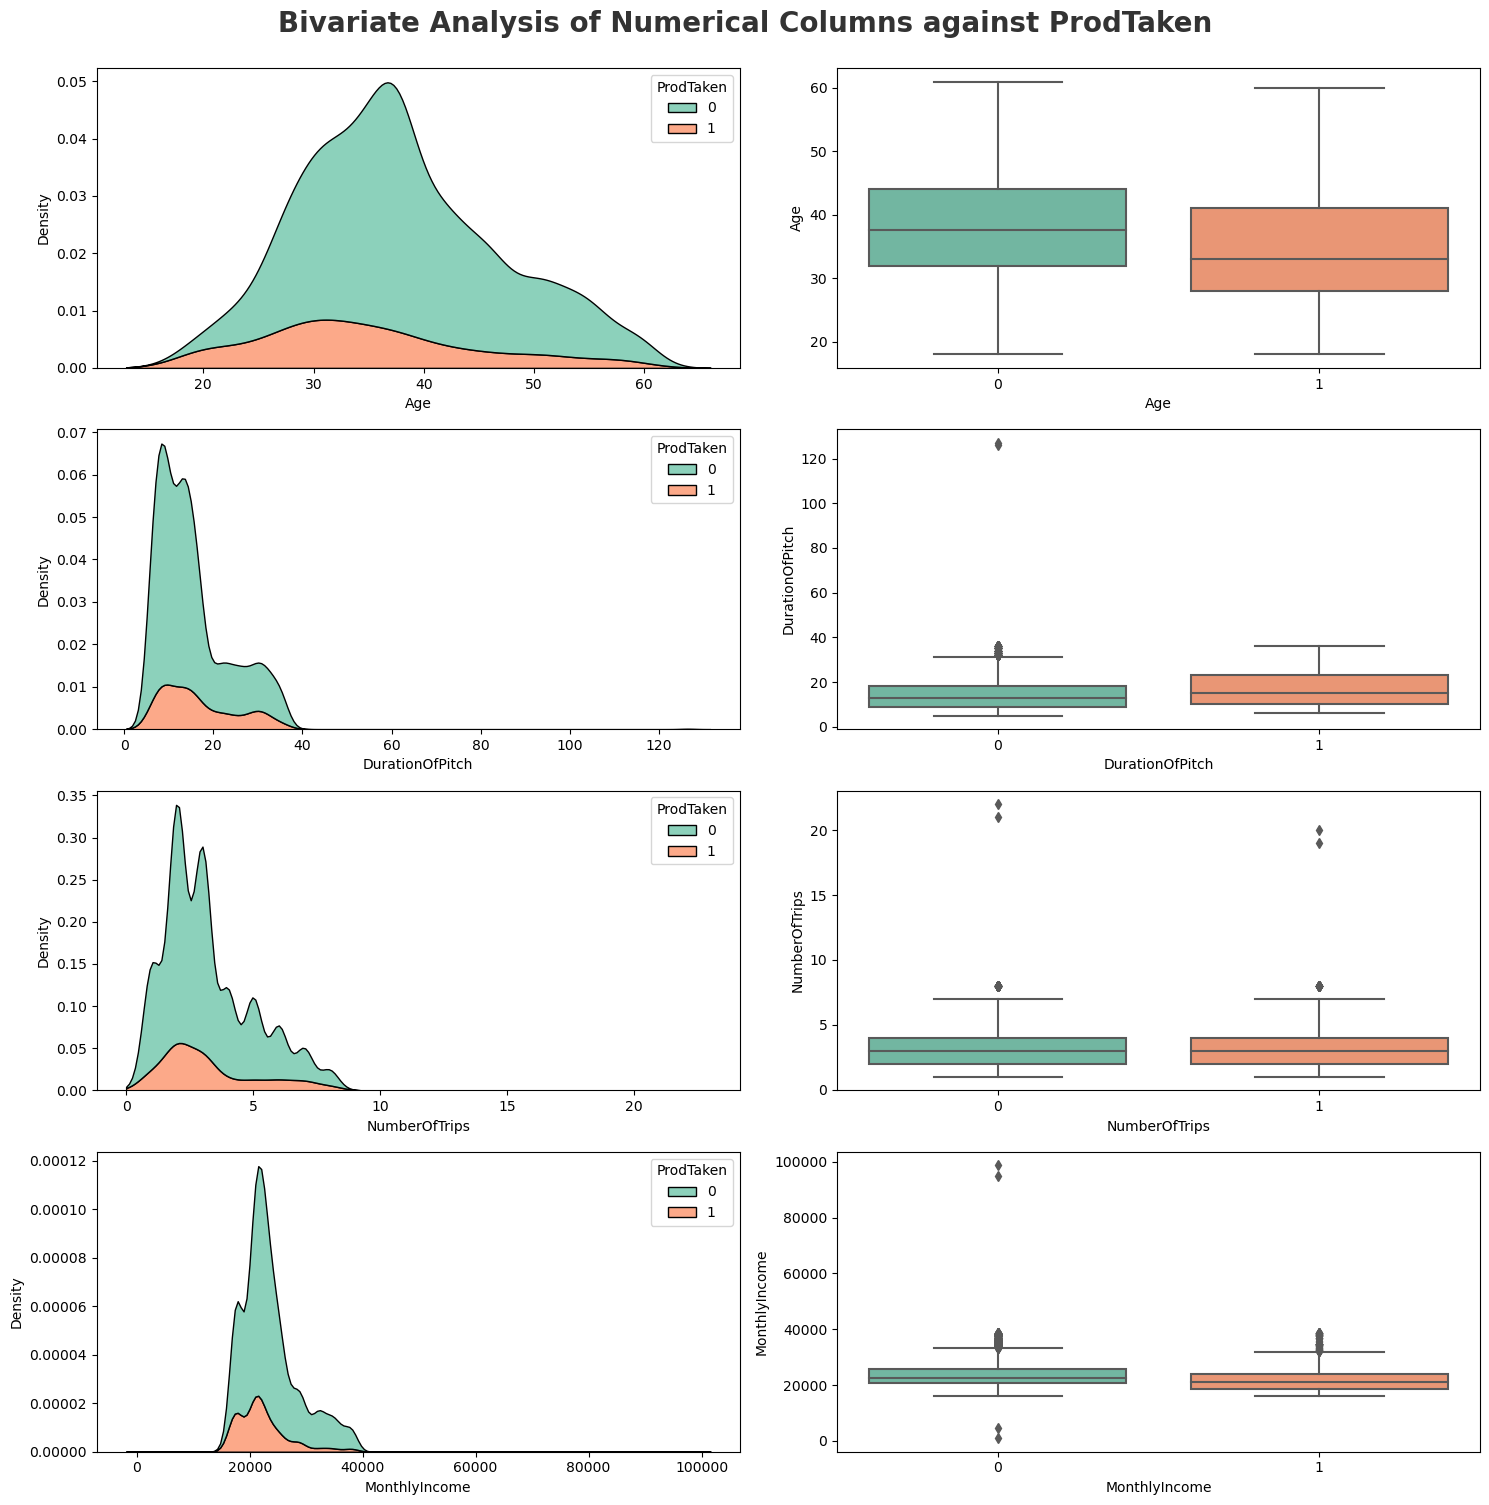

In [109]:
plt.figure(figsize=(15, 15))
plt.suptitle('Bivariate Analysis of Numerical Columns against ProdTaken', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

# Plot KDE dan Box plot untuk setiap kolom numerikal dengan target 'ProdTaken'
for i, col in enumerate(num_cols):
    plt.subplot(4, 2, 2*i+1)
    sns.kdeplot(data=df, x=col, hue='ProdTaken', fill=True, multiple='stack', palette='Set2')
    plt.xlabel(col)
    
    plt.subplot(4, 2, 2*i+2)
    sns.boxplot(data=df, x='ProdTaken', y=col, palette='Set2')
    plt.xlabel(col)
    
plt.tight_layout()
plt.show()

Berdasarkan hasil visualisasi diatas dapat disimpulkan bahwa:
- Umur customer yang membeli paket perjalanan berada pada retang 29-40 tahun
- Duration of pitch yang dilakukan sales selama kurang dari 20 menit akan meningkatkan kemungkinan customer mengambil paket perjalanan
- Customer dengan pendapatan bulanan sekitar 15000-25000 berkemungkinan lebih tertarik untuk membeli paket perjalanan
Customer yang membeli paket perjalanan tidak melelati lebih dari 5 kali perjalanan dalam satu tahun

In [110]:
from scipy import stats
import pandas as pd

features = num_cols  # Asumsikan num adalah list nama fitur numerik yang ingin diuji

results = []  # List untuk menyimpan hasil t-test

for feature in features:
    prod_taken_0 = df[df['ProdTaken'] == 0][feature]
    prod_taken_1 = df[df['ProdTaken'] == 1][feature]
    
    t_stat, p_value = stats.ttest_ind(prod_taken_0.dropna(), prod_taken_1.dropna())
    
    # Menentukan hasil uji t-test
    if p_value < 0.05: 
        hypothesis = f"H1 diterima: Ada perbedaan signifikan"
    else:
        hypothesis = "H0 diterima: Tidak cukup bukti untuk menolak hipotesis nol"
    
    results.append([feature, t_stat, p_value, hypothesis])

# Membuat DataFrame dari hasil t-test
result_df = pd.DataFrame(results, columns=['Feature', 't-statistic', 'p-value', 'Hypothesis Result'])
result_df

,Feature,t-statistic,p-value,Hypothesis Result
0,Age,10.186727,3.965384e-24,H1 diterima: Ada perbedaan signifikan
1,DurationOfPitch,-5.341114,9.658835e-08,H1 diterima: Ada perbedaan signifikan
2,NumberOfTrips,-1.184012,2.364660e-01,H0 diterima: Tidak cukup bukti untuk menolak h...
3,MonthlyIncome,8.918136,6.595211e-19,H1 diterima: Ada perbedaan signifikan


dari hasil uji t-test

Age: Hipotesis nol ditolak, menunjukkan perbedaan yang signifikan antara grup 'ProdTaken'. Ini menunjukkan bahwa usia dapat memainkan peran penting dalam keputusan pembelian.

DurationOfPitch: Hipotesis nol ditolak, menunjukkan perbedaan yang signifikan antara grup 'ProdTaken'. Ini mengindikasikan bahwa durasi presentasi memiliki pengaruh yang signifikan terhadap keputusan pembelian.

NumberOfTrips: Tidak cukup bukti untuk menolak hipotesis nol, yang berarti tidak ada perbedaan signifikan antara grup 'ProdTaken' terkait dengan jumlah perjalanan.

MonthlyIncome: Hipotesis nol ditolak, menunjukkan perbedaan yang signifikan antara grup 'ProdTaken'. Ini menunjukkan bahwa pendapatan bulanan dapat memiliki pengaruh yang signifikan terhadap keputusan pembelian.

### Categorical Columns Vs ProdTaken

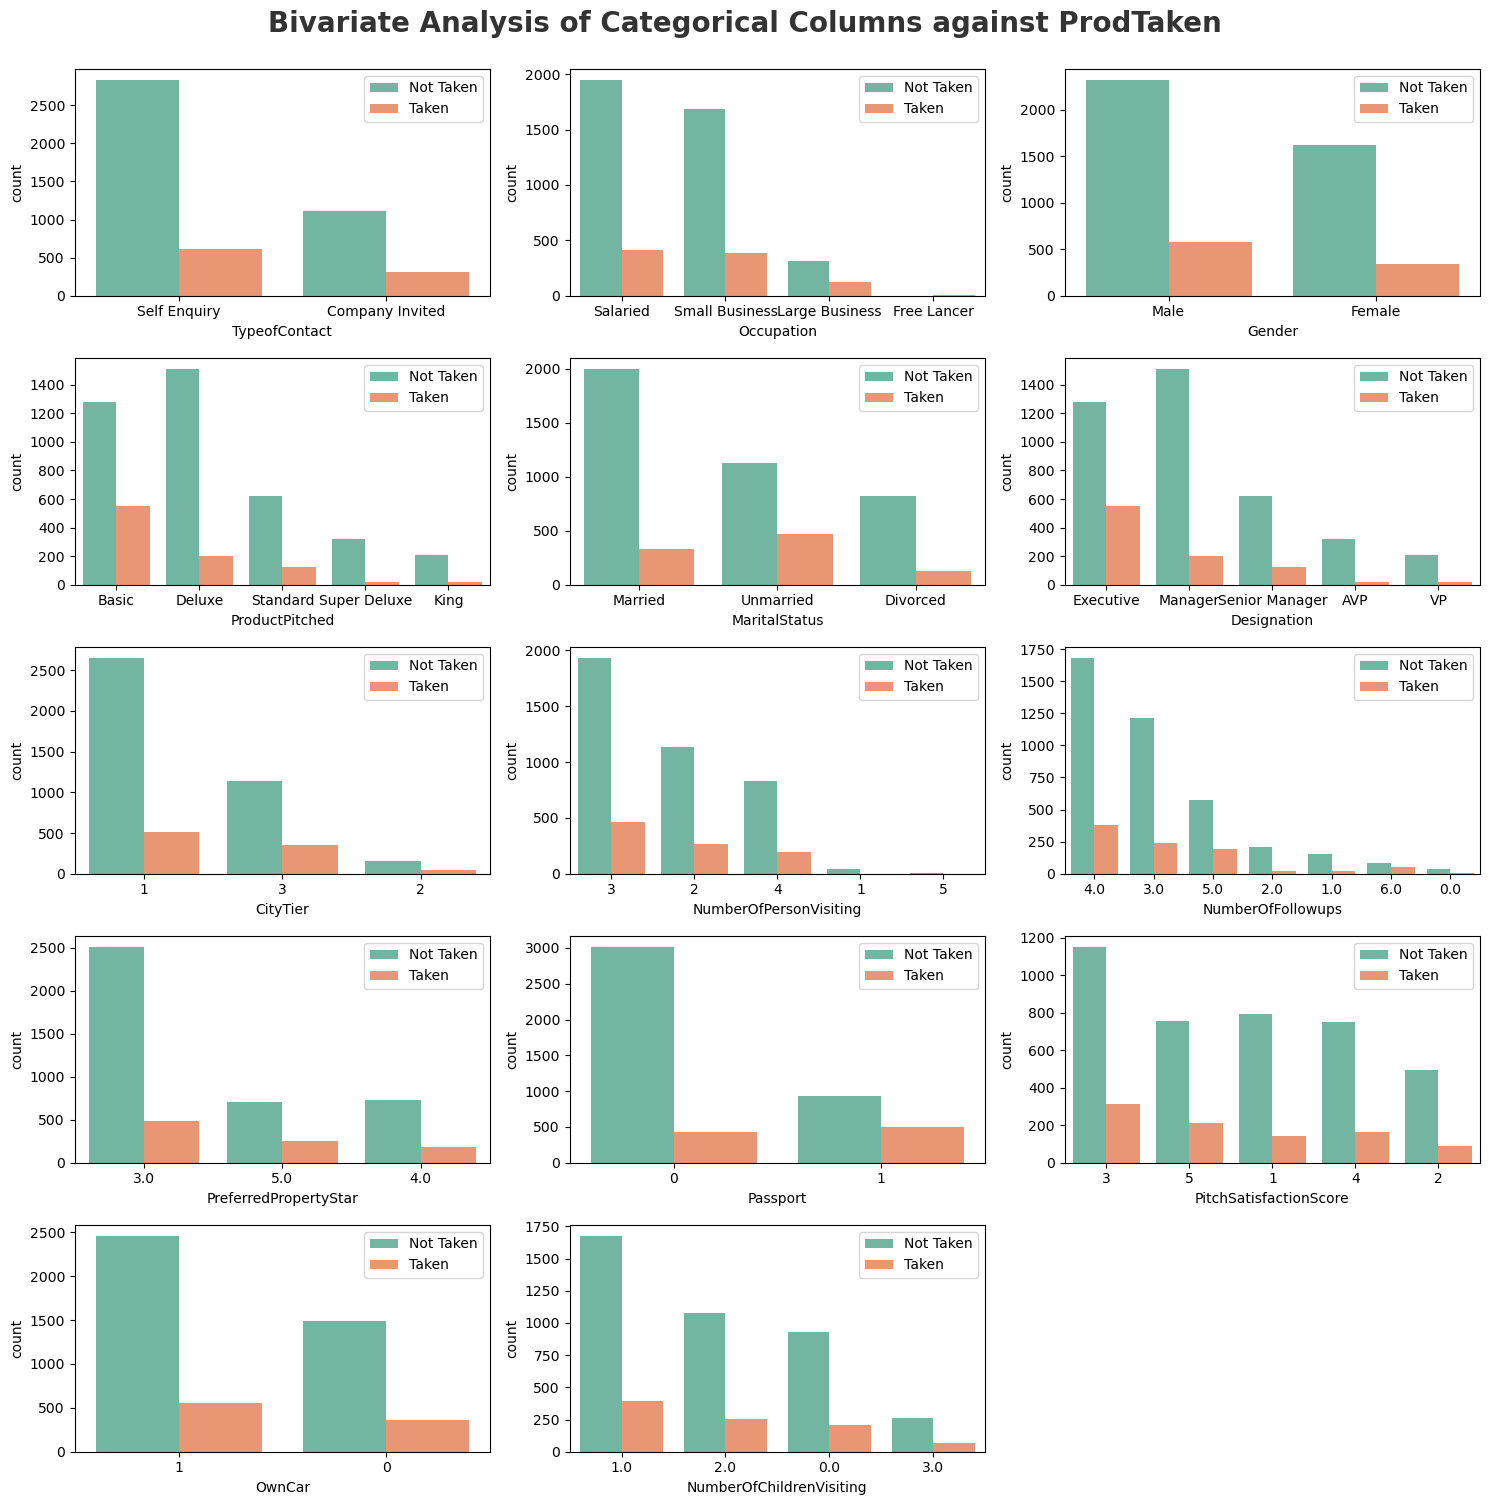

In [111]:
cat = ['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation',
            'CityTier', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar',
            'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting']

plt.figure(figsize=(15, 15))
plt.suptitle('Bivariate Analysis of Categorical Columns against ProdTaken', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(cat)):
    plt.subplot(5, 3, i+1)
    sorted_vals = df[cat[i]].value_counts().index
    sns.countplot(x=df[cat[i]], hue=df['ProdTaken'], order=sorted_vals, palette='Set2')
    plt.legend(['Not Taken', 'Taken'])

plt.tight_layout()
plt.show()

Berdasarkan Visualisasi diatas dapat disimpulkan bahwa:
- Customer dengan tipe kontrak Self Enquiry membeli paket lebih banyak daripada customer dengan tipe kontrak Company Invited
- Customer yang berada di city tier 3 memiliki persentase pembelian paket lebih tinggi setelah ditawarkan oleh sales
- Customer dengan Occupation Salaried dan Small Business memiliki ketertarikan untuk membeli paket yang ditawarkan
- Customer dengan gender Male lebih banyak mengambil paket yang ditawarkan daripada female atau fe male
- Distribusi jumlah orang yang ikut dalam perjalanan dengan customer yang mengambil penawaran paket travel paling banyak adalah 3 orang
- Customner yang di-follow up antara 3-5 kali lebih banyak yang mengambil penawaran travel dibandingkan dengan yang ditawarkan kurang dari 3 kali atau lebih dari 5 kali
- Product basic yang ditawarkan oleh sales lebih banyak diambil daripada produk lainnya
- Customer yang menerima penawaran paket travel lebih banyak memilih property bintang tiga dibanding bintang empat dan lima
- Customer dengan status single atau unmarried lebih banyak menerima penawaran paket travel
- Customer yang memiliki passport memiliki persentase menerima penawaran paket travel lebih tinggi daripada yang tidak memiliki passport
- Customer yang memberikan score kepuasan >=3 lebih banyak membeli paket perjalanan.
- Customer yang memiliki mobil lebih banyak menerima penawaran paket travel
- Customer dengan jumlah anak 1 lebih banyak menerima penawaran paket travel
- Customer dengan jabatan Executive lebih banyak menerima penawaran paket travel

In [112]:
#Uji Hipotesis menggunakan chisquare pada kolom kategorikal terhadap target
#H0 : Tidak berkorelasi dengan target
#H1 : Berkorelasi dengan target
from scipy.stats import chi2_contingency

chi2_check = []
for i in cat:  # Menggunakan variabel 'cat' yang merupakan list nama kolom kategorikal
    contingency_table = pd.crosstab(df['ProdTaken'], df[i])
    p_value = chi2_contingency(contingency_table)[1]
    
    if p_value < 0.05:
        chi2_check.append('H1 diterima: Berkorelasi dengan target')
    else:
        chi2_check.append('H0 diterima: Tidak berkorelasi dengan target')

result = pd.DataFrame(data=[cat, chi2_check]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,TypeofContact,H1 diterima: Berkorelasi dengan target
1,Occupation,H1 diterima: Berkorelasi dengan target
2,Gender,H1 diterima: Berkorelasi dengan target
3,ProductPitched,H1 diterima: Berkorelasi dengan target
4,MaritalStatus,H1 diterima: Berkorelasi dengan target
5,Designation,H1 diterima: Berkorelasi dengan target
6,CityTier,H1 diterima: Berkorelasi dengan target
7,NumberOfPersonVisiting,H1 diterima: Berkorelasi dengan target
8,NumberOfFollowups,H1 diterima: Berkorelasi dengan target
9,PreferredPropertyStar,H1 diterima: Berkorelasi dengan target


Berdasarkan uji hipotesis diatas dapat disimpulkan bahwa kolom `Gender`, `OwnCar`, dan `NumberOfChildrenVisiting` tidak akan dimasukkan kedalam feature karena tidak berkorelasi dengan target (`ProdTaken`)

## Multivariate Analysis

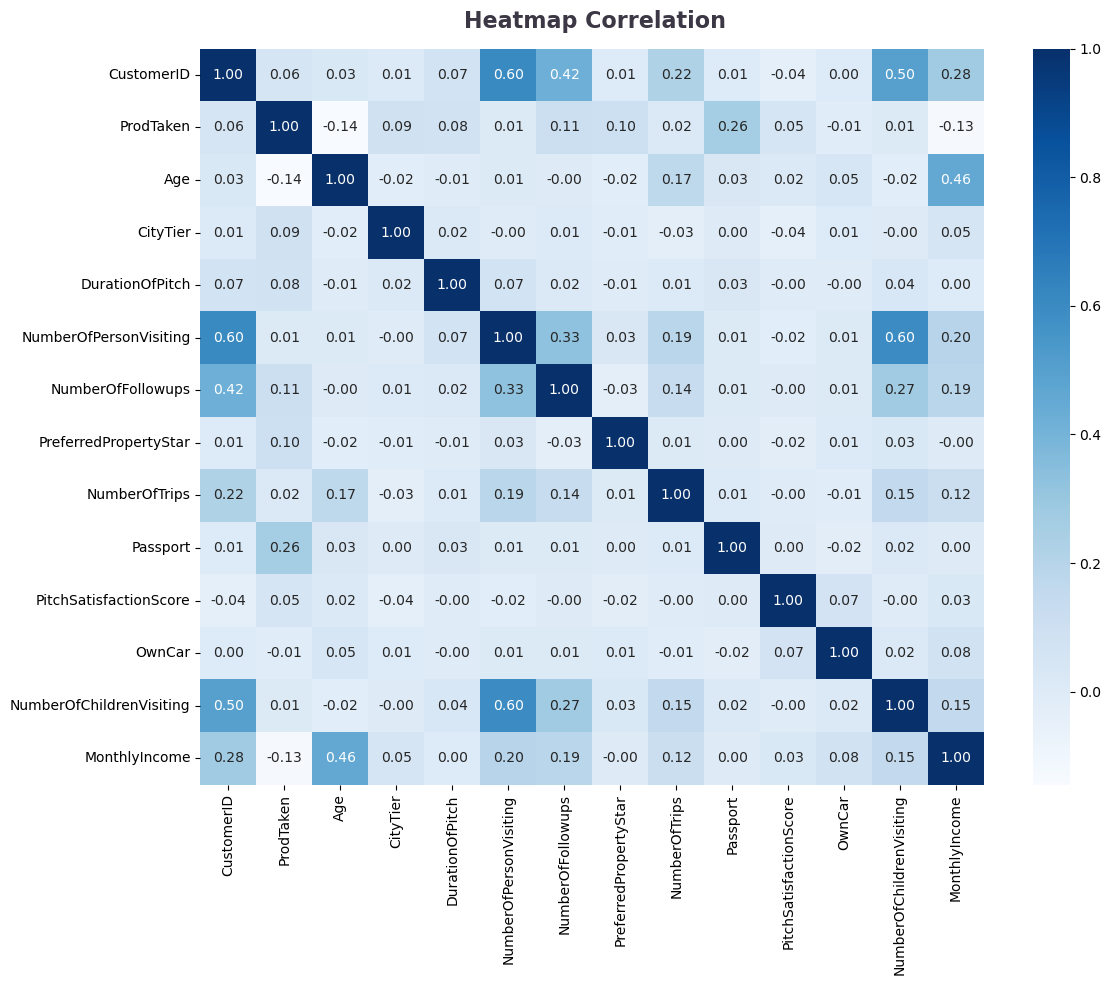

In [113]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='Blues')
plt.suptitle('Heatmap Correlation', color='#3C3744', fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

Berdasarakan visualisasi heatmap dapat diketahui bahwa:
- kolom target (`ProdTaken`) memiliki korelasi paling kuat dengan kolom Passport (0.26)
- kolom `NumberofPersonVisiting` dan kolom `NumberofChildrenVisiting` memiliki korelasi yang sangat tinggi (0.61) dan ada kemungkinan kolom tersebut redundant dan akan dipilih salah satu

## Business Insights

In [114]:
df_eda = df.copy()

#### Product mana yang diminati oleh pelanggan?

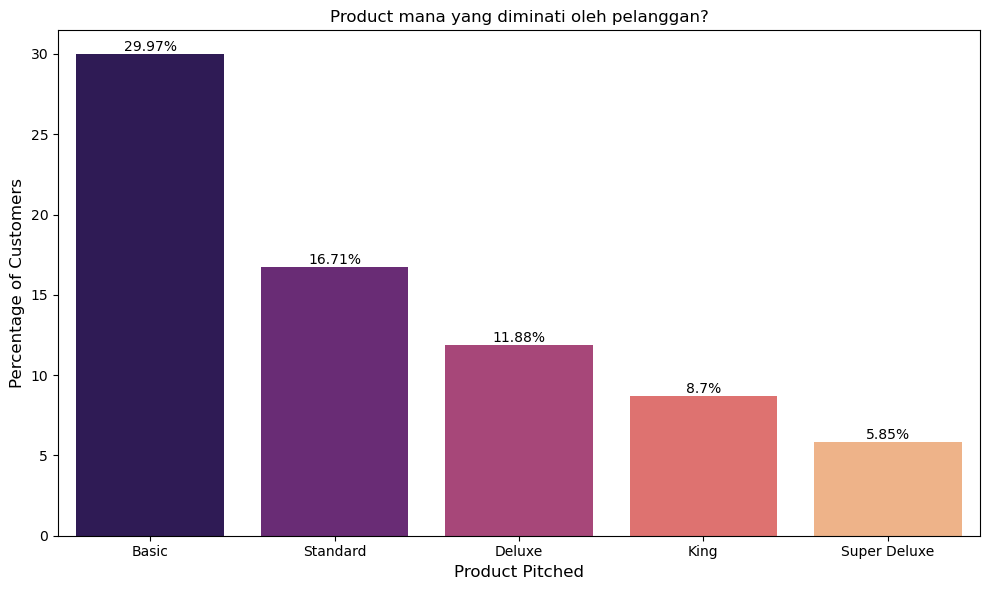

In [115]:
df_p = df_eda.groupby(['ProductPitched', 'ProdTaken'])['CustomerID'].count().reset_index(name='TotalCustomer')\
.merge(df_eda.groupby(['ProductPitched'])['CustomerID'].count(),on ='ProductPitched')
df_p = df_p[df_p.ProdTaken==1].reset_index(drop=True)
df_p['Persen']=round(df_p.TotalCustomer/df_p.CustomerID*100,2)
df_p = df_p.sort_values(by='Persen', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='ProductPitched', y='Persen', data=df_p, palette='magma')

for idx, value in enumerate(df_p['Persen']):
    plt.text(idx, value, f"{value}%", ha='center', va='bottom', fontsize=10)

plt.xlabel('Product Pitched', fontsize=12)
plt.ylabel('Percentage of Customers', fontsize=12)
plt.title('Product mana yang diminati oleh pelanggan?')
plt.tight_layout()
plt.show()

Insight

produk dengan nama Basic memiliki jumlah pelanggan yang membeli tertinggi (552 pelanggan atau sekitar 29.97%). Ini menunjukkan bahwa produk Basic lebih diminati dibandingkan dengan produk lainnya dalam kategori ini.

Secara relatif, produk Basic memiliki tingkat konversi yang lebih tinggi dibandingkan dengan produk lainnya seperti Standard, Deluxe, King, dan Super Deluxe. Hal ini dapat mengindikasikan bahwa strategi pemasaran atau keunggulan produk pada kategori Basic mungkin lebih menarik bagi pelanggan dan memiliki daya tarik yang lebih besar dalam membuat keputusan pembelian.

#### Apakah jumlah followups dari sales mempengaruhi Customers untuk membeli paket perjalanan?

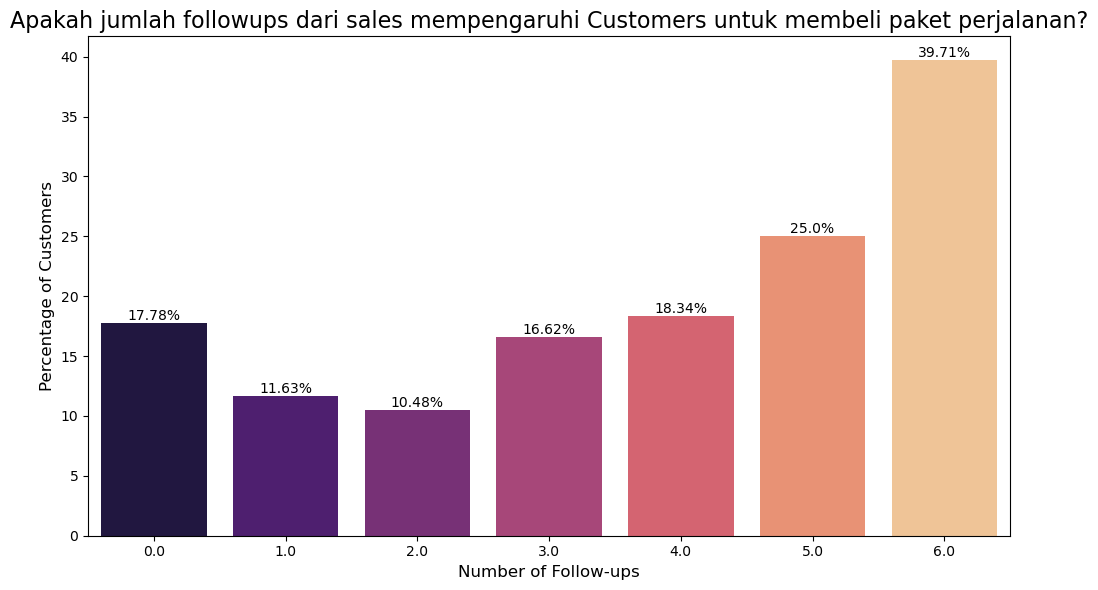

In [116]:
total_customers = df_eda.groupby(['NumberOfFollowups', 'ProdTaken'])['CustomerID'].count().reset_index(name='TotalCustomers')

# Menghitung persentase pelanggan yang mengambil produk
percentage_customers = round(df_eda.groupby(['NumberOfFollowups', 'ProdTaken'])['CustomerID'].count() / df_eda.groupby(['NumberOfFollowups'])['CustomerID'].count() * 100, 2)
percentage_customers = percentage_customers.reset_index(name='PercCust')

# Menggabungkan kedua DataFrame
df_followups = total_customers.merge(percentage_customers, on=['NumberOfFollowups', 'ProdTaken'])
df_followups = df_followups[df_followups.ProdTaken == 1].reset_index(drop=True)

plt.figure(figsize=(10, 6))
sns.barplot(x='NumberOfFollowups', y='PercCust', data=df_followups, palette='magma')

for idx, value in enumerate(df_followups['PercCust']):
    plt.text(idx, value, f"{value}%", ha='center', va='bottom', fontsize=10)

plt.xlabel('Number of Follow-ups', fontsize=12)
plt.ylabel('Percentage of Customers', fontsize=12)
plt.title('Apakah jumlah followups dari sales mempengaruhi Customers untuk membeli paket perjalanan?', fontsize=16)
plt.tight_layout()
plt.show()

#### Apakah Customer dari tiap City Tier yang berbeda memiliki ketertarikan dalam membeli paket perjalanan?

In [117]:
# Menghitung jumlah total pelanggan per tier kota yang membeli produk
df_citytier = df_eda.groupby(['CityTier', 'ProdTaken'])['CustomerID'].count().reset_index(name='TotalCustomers')\
        .merge(df_eda.groupby(['CityTier'])['CustomerID'].count(),on = 'CityTier')

# Menghitung persentase pelanggan per tier kota yang membeli produk
df_citytier = df_citytier[df_citytier.ProdTaken==1].reset_index(drop=True)
df_citytier['Persen']=round(df_citytier.TotalCustomers/df_citytier.CustomerID*100,2)
# Mengurutkan DataFrame berdasarkan persentase secara menurun
df_citytier = df_citytier.sort_values(by='Persen',ascending=False).reset_index(drop=True)
df_citytier

,CityTier,ProdTaken,TotalCustomers,CustomerID,Persen
0,3,1,353,1492,23.66
1,2,1,46,198,23.23
2,1,1,518,3173,16.33


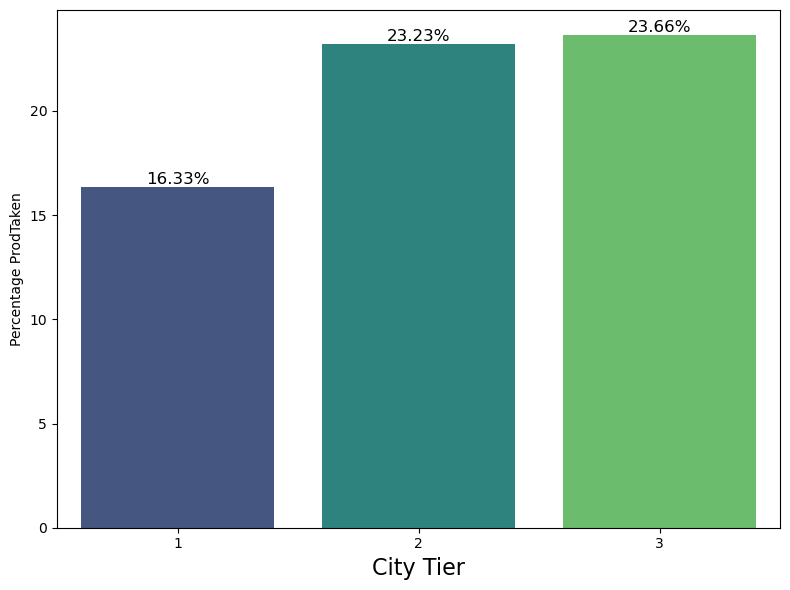

In [118]:
plt.figure(figsize=(8, 6))
sns.barplot(x='CityTier', y='Persen', data=df_citytier, palette='viridis')
plt.title('')
plt.xlabel('City Tier', fontsize=16)
plt.ylabel('Percentage ProdTaken')
data_bars = df_citytier.sort_values('Persen', ascending=True)['Persen'].values
for num, text in enumerate(data_bars):
    plt.text(num, text, f'{text:.2f}%', ha='center', va='bottom', fontsize=12)
plt.tight_layout()
plt.show()

Insight

tingkat konversi, atau persentase pelanggan yang telah mengambil produk, ternyata lebih tinggi di CityTier 3 (23.60%) dan CityTier 2 (23.23%) meskipun jumlah pelanggannya lebih sedikit dibandingkan dengan CityTier 1 (16.30%) yang memiliki jumlah pelanggan terbanyak. Hal ini menunjukkan bahwa meskipun jumlah pelanggan bisa lebih sedikit, tingkat konversi yang lebih tinggi di CityTier 3 dan 2 bisa menjadi peluang yang menarik dalam strategi pemasaran, mungkin dengan fokus lebih lanjut pada profil atau preferensi pelanggan di tingkat kota tersebut.

#### Apakah Customers yang memiliki passport lebih tertarik mengambil paket perjalanan?

In [119]:
df_passport = df_eda.groupby(['Passport','ProdTaken']).CustomerID.count().reset_index()\
        .merge(df_eda.groupby(['Passport']).CustomerID.count(),on='Passport')
df_passport['Persen']=round(df_passport.CustomerID_x/df_passport.CustomerID_y*100,2)
df_passport = df_passport[df_passport.ProdTaken==1].sort_values(by='Persen',ascending=False).reset_index(drop=True)
df_passport

,Passport,ProdTaken,CustomerID_x,CustomerID_y,Persen
0,1,1,494,1422,34.74
1,0,1,423,3441,12.29


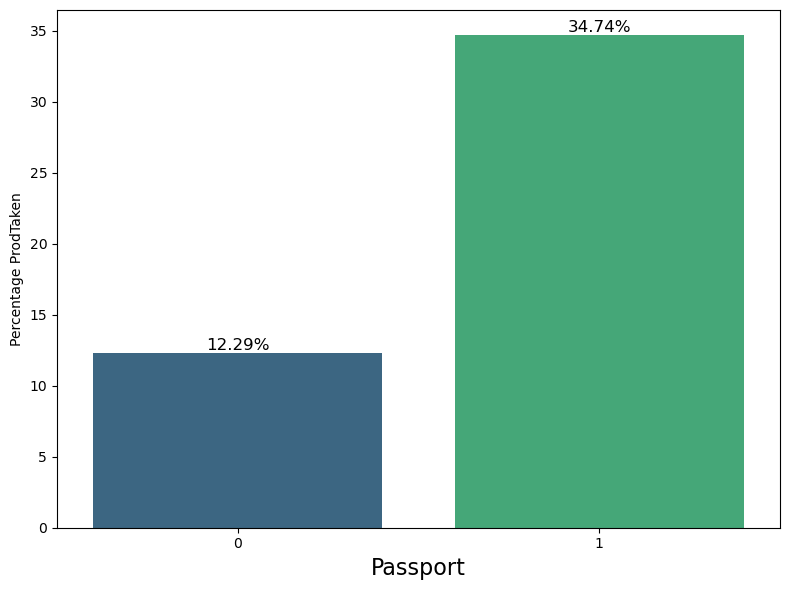

In [120]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Passport', y='Persen', data=df_passport, palette='viridis')
plt.title('')
plt.xlabel('Passport', fontsize=16)
plt.ylabel('Percentage ProdTaken')
data_bars = df_passport.sort_values('Persen', ascending=True)['Persen'].values
for num, text in enumerate(data_bars):
    plt.text(num, text, f'{text:.2f}%', ha='center', va='bottom', fontsize=12)
plt.tight_layout()
plt.show()

Insight: 

terdapat perbedaan signifikan dalam persentase pelanggan yang telah mengambil produk antara mereka yang memiliki paspor dan yang tidak memiliki. Proporsi pelanggan yang telah mengambil produk jauh lebih tinggi di antara mereka yang memiliki paspor (34.74%) dibandingkan dengan yang tidak memiliki (12.29%). Hal ini bisa menunjukkan adanya korelasi atau pengaruh antara kepemilikan paspor dengan keputusan pelanggan untuk mengambil produk. Namun, perlu analisis lebih lanjut untuk memahami apakah faktor kepemilikan paspor secara langsung memengaruhi keputusan tersebut atau terdapat faktor lain yang turut berperan dalam pengambilan keputusan pelanggan.

#### Segmentasi MonthlyIncome dan Segmentasi Umur Customers yang mengambiil paket perjalanan

In [121]:
def segmentasi_income(income):
    if income <= 20346:
        segmentasi = 'Low Income'
    elif 20346 < income <= 25571:
        segmentasi = 'Middle Income'
    else:
        segmentasi = 'High Income'
    return segmentasi

# Menggunakan fungsi apply dengan lambda untuk membuat kolom baru 'segmentasi_income'
df_eda['segmentasi_income'] = df_eda['MonthlyIncome'].apply(segmentasi_income)
df_eda.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,...,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,segmentasi_income
0,200000,1,41.000000,Self Enquiry,3,6.0,Salaried,Female,3,3.0,...,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0,Middle Income
1,200001,0,49.000000,Company Invited,1,14.0,Salaried,Male,3,4.0,...,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0,Low Income
2,200002,1,37.000000,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,...,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0,Low Income
3,200003,0,33.000000,Company Invited,1,9.0,Salaried,Female,2,3.0,...,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0,Low Income
4,200004,0,37.622265,Self Enquiry,1,8.0,Small Business,Male,2,3.0,...,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0,Low Income


#### Jumlah Pelanggan Ditelfon Berdasarkan Segmentasi Umur

In [122]:
def segment(x):
    if x['Age'] <= 21:
        segment = 'Teen'
    elif (x['Age'] >= 21 and x['Age'] <= 55):
        segment = 'Adult'
    else:
        segment = 'Elderly'
    return segment

df_eda['segment'] = df_eda.apply(lambda x: segment(x), axis=1)

In [123]:
gb1 = df_eda.groupby(['segment', 'ProdTaken']).agg({'CustomerID':'nunique'}).reset_index()
gb1

,segment,ProdTaken,CustomerID
0,Adult,0,3739
1,Adult,1,799
2,Elderly,0,159
3,Elderly,1,41
4,Teen,0,48
5,Teen,1,77


In [124]:
gb2 = df_eda.groupby('segment').agg({'CustomerID':'nunique'}).reset_index()

gbm = gb1.merge(gb2 , how='inner', on='segment')

gbm.columns = ['segment', 'ProdTaken', 'Pelanggan Ditelfon','Total Pelanggan']

gbm

,segment,ProdTaken,Pelanggan Ditelfon,Total Pelanggan
0,Adult,0,3739,4538
1,Adult,1,799,4538
2,Elderly,0,159,200
3,Elderly,1,41,200
4,Teen,0,48,125
5,Teen,1,77,125


In [125]:
gbm['Rasio'] = 100 * gbm['Pelanggan Ditelfon'] / gbm.groupby('Total Pelanggan')['Pelanggan Ditelfon'].transform('sum')
gbm

,segment,ProdTaken,Pelanggan Ditelfon,Total Pelanggan,Rasio
0,Adult,0,3739,4538,82.393125
1,Adult,1,799,4538,17.606875
2,Elderly,0,159,200,79.500000
3,Elderly,1,41,200,20.500000
4,Teen,0,48,125,38.400000
5,Teen,1,77,125,61.600000


In [126]:
result = gbm[(gbm['ProdTaken']==1)]
result

,segment,ProdTaken,Pelanggan Ditelfon,Total Pelanggan,Rasio
1,Adult,1,799,4538,17.606875
3,Elderly,1,41,200,20.500000
5,Teen,1,77,125,61.600000


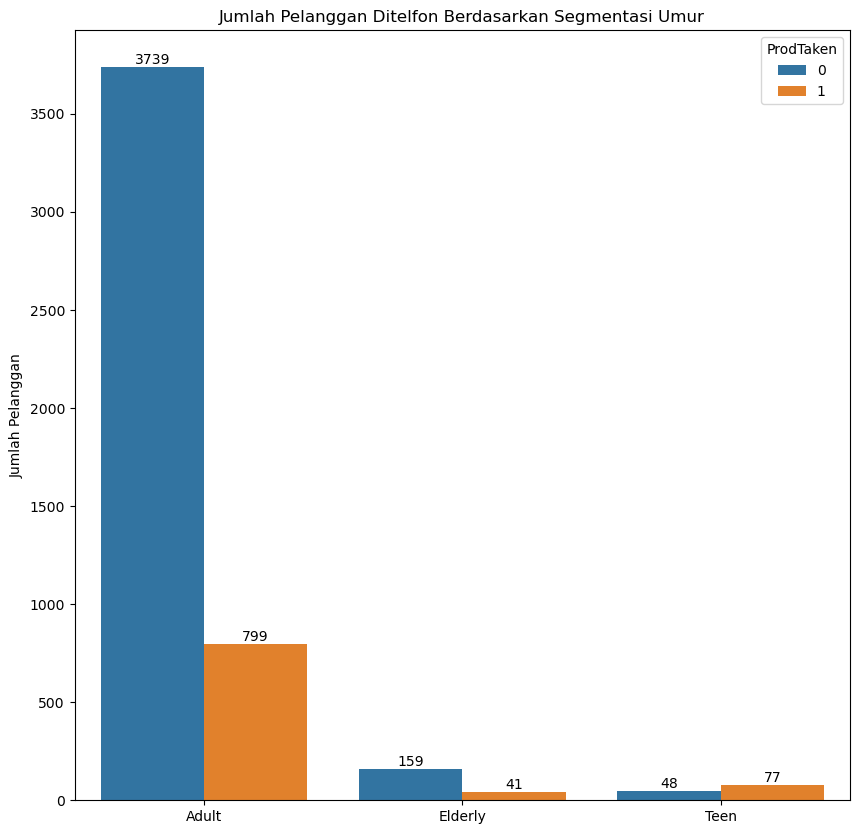

<Figure size 640x480 with 0 Axes>

In [127]:
# Visualisasi jumlah pelanggan yang dihubungi berdasarkan segmentasi umur dengan subplot
plt.figure(figsize=(10, 10))

# Barplot jumlah pelanggan yang dihubungi per segment umur dan kategori produk yang diambil
ax = sns.barplot(y='Pelanggan Ditelfon', x='segment', data=gbm, hue='ProdTaken', errwidth=0)
ax.set(xlabel='', ylabel='Jumlah Pelanggan', title='Jumlah Pelanggan Ditelfon Berdasarkan Segmentasi Umur')

# Menambahkan label pada barplot
for container in ax.containers:
    ax.bar_label(container)

plt.figure()

plt.show()

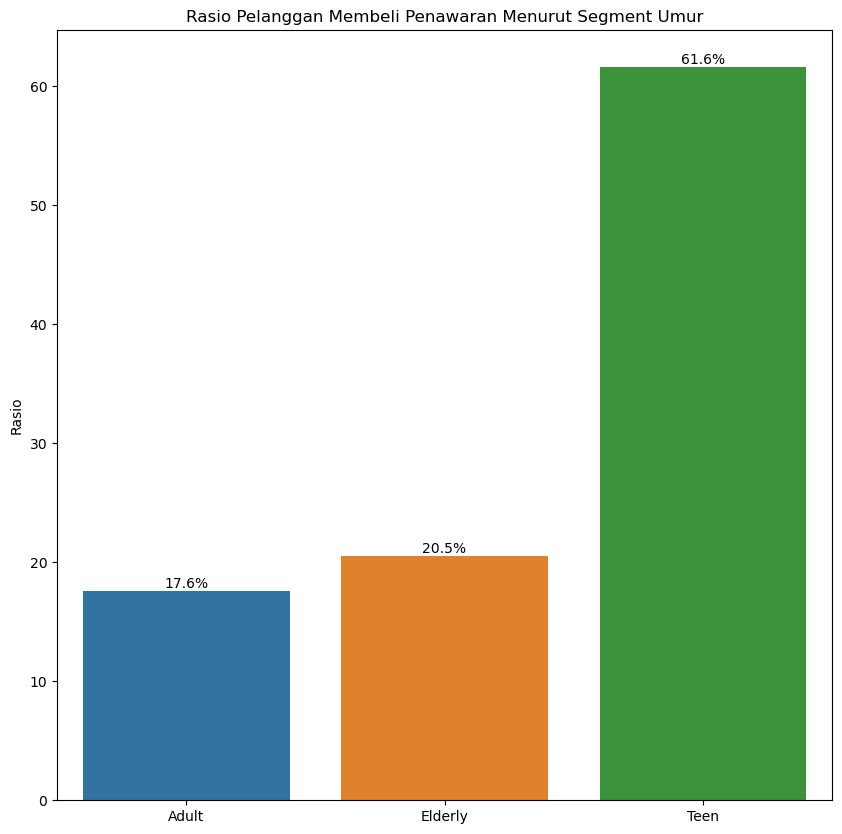

In [128]:
# Syntax untuk visualisasi rasio pelanggan yang membeli penawaran berdasarkan segmentasi umur
plt.figure(figsize=(10, 10))
ax2 = sns.barplot(y='Rasio', x='segment', data=result, errwidth=0)
ax2.set(xlabel='', ylabel='Rasio', title='Rasio Pelanggan Membeli Penawaran Menurut Segment Umur')

for container in ax2.containers:
    ax2.bar_label(container, fmt='%.1f%%')

#### Bagaimana distribusi 'ProdTaken' (nilai 0 atau 1) berubah berdasarkan segmentasi 'MonthlyIncome'.

In [129]:
def segmentasi_income(a):
    if a['MonthlyIncome'] <= 20346:
        segmentasi = 'Low Income'
    elif 20346 < a['MonthlyIncome'] <= 25571:
        segmentasi = 'Middle Income'
    else:
        segmentasi = 'High Income'
    return segmentasi

df_eda['segmentasi_income'] = df_eda.apply(lambda x: segmentasi_income(x), axis=1)
df_eda.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,...,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,segmentasi_income,segment
0,200000,1,41.000000,Self Enquiry,3,6.0,Salaried,Female,3,3.0,...,Unmarried,1.0,1,2,1,0.0,Manager,20993.0,Middle Income,Adult
1,200001,0,49.000000,Company Invited,1,14.0,Salaried,Male,3,4.0,...,Divorced,2.0,0,3,1,2.0,Manager,20130.0,Low Income,Adult
2,200002,1,37.000000,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,...,Unmarried,7.0,1,3,0,0.0,Executive,17090.0,Low Income,Adult
3,200003,0,33.000000,Company Invited,1,9.0,Salaried,Female,2,3.0,...,Divorced,2.0,1,5,1,1.0,Executive,17909.0,Low Income,Adult
4,200004,0,37.622265,Self Enquiry,1,8.0,Small Business,Male,2,3.0,...,Divorced,1.0,0,5,1,0.0,Executive,18468.0,Low Income,Adult


In [130]:
# Menghitung jumlah pelanggan yang membeli dan tidak membeli produk per segmentasi pendapatan
segment_counts_1 = df_eda[df_eda['ProdTaken'] == 1]['segmentasi_income'].value_counts().sort_index()
segment_counts_0 = df_eda[df_eda['ProdTaken'] == 0]['segmentasi_income'].value_counts().sort_index()

income_segments = segment_counts_1.index.union(segment_counts_0.index)

# Membuat DataFrame baru dari hasil perhitungan
result_df = pd.DataFrame({'Segment': income_segments,
                          'Customers_Bought': [segment_counts_1.get(seg, 0) for seg in income_segments],
                          'Customers_Not_Bought': [segment_counts_0.get(seg, 0) for seg in income_segments]})

# Menampilkan DataFrame hasil
result_df

,Segment,Customers_Bought,Customers_Not_Bought
0,High Income,144,1019
1,Low Income,308,858
2,Middle Income,465,2069


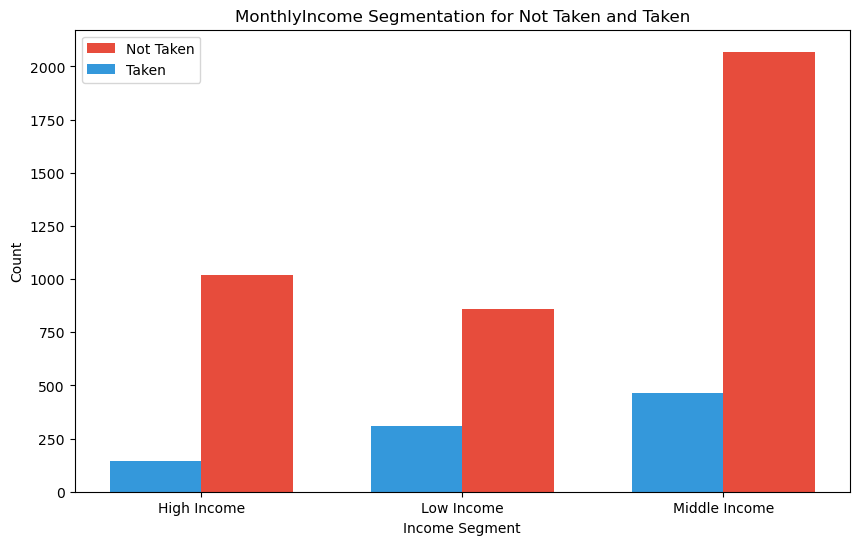

In [131]:
# Assuming 'segmentasi_income' is a categorical variable in your DataFrame
segment_counts_1 = df_eda[df_eda['ProdTaken'] == 1]['segmentasi_income'].value_counts()
segment_counts_0 = df_eda[df_eda['ProdTaken'] == 0]['segmentasi_income'].value_counts()

# Extract unique income segments
income_segments = segment_counts_1.index.union(segment_counts_0.index)

# Set up positions for bars
bar_positions = np.arange(len(income_segments))
bar_width = 0.35

# Plot the grouped bar chart
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(bar_positions + bar_width/2, segment_counts_0.reindex(income_segments, fill_value=0), bar_width, label='Not Taken', color='#e74c3c')
ax.bar(bar_positions - bar_width/2, segment_counts_1.reindex(income_segments, fill_value=0), bar_width, label='Taken', color='#3498db')

ax.set_xticks(bar_positions)
ax.set_xticklabels(income_segments)
ax.set_xlabel('Income Segment')
ax.set_ylabel('Count')
ax.set_title('MonthlyIncome Segmentation for Not Taken and Taken')
ax.legend()

plt.show()

- Segmen Low Income memiliki persentase 'taken' tertinggi (sekitar 26.43%), diikuti oleh Middle Income (sekitar 18.34%), dan High Income memiliki persentase 'taken' yang paling rendah (sekitar 12.37%).
- Segmen High Income memiliki persentase 'not taken' yang paling tinggi (sekitar 87.63%), sedangkan Low Income memiliki persentase 'not taken' yang lebih rendah (sekitar 73.57%), dan Middle Income berada di antara keduanya (sekitar 81.66%).

#### Segmentasi MonthlyIncome dan Segmentasi Umur Customers yang mengambiil paket perjalanan

posx and posy should be finite values
posx and posy should be finite values


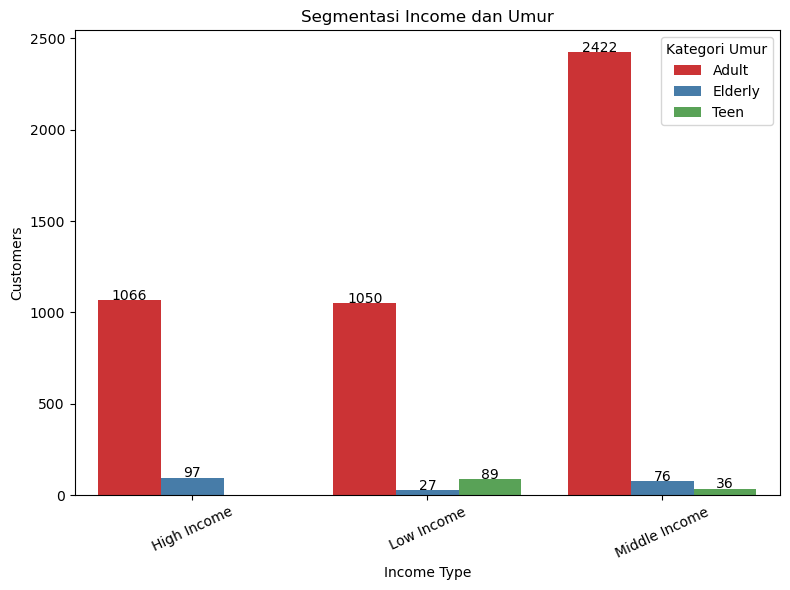

In [132]:
# Pengelompokan ganda berdasarkan segmentasi pendapatan dan segmentasi umur
segmentasi_combined = df_eda.groupby(['segmentasi_income', 'segment'])['CustomerID'].count().reset_index()

# Visualisasi pengelompokan ganda
plt.figure(figsize=(8, 6))
plot = sns.barplot(x='segmentasi_income', y='CustomerID', hue='segment', data=segmentasi_combined, palette='Set1')
plt.xlabel('Income Type')
plt.ylabel('Customers')
plt.title('Segmentasi Income dan Umur')
plt.legend(title='Kategori Umur', bbox_to_anchor=(1, 1))
plt.xticks(rotation=25)
plt.tight_layout()

# Menambahkan label nilai pada setiap bar
for p in plot.patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2, height + 1, f'{height:.0f}', ha='center')

plt.show()


distribusi pelanggan dalam berbagai kelompok pendapatan dan usia. Mayoritas pelanggan berada dalam kategori pendapatan menengah dengan sebagian besar dari mereka berada dalam kategori usia dewasa. Pelanggan dengan pendapatan tinggi lebih cenderung berada dalam kategori usia dewasa, sedangkan pelanggan dengan pendapatan rendah memiliki kecenderungan yang lebih bervariasi dalam distribusi usia mereka.

# Data Prepration

In [133]:
df_prep = df.copy()

## Handling Outliers

In [134]:
from scipy import stats

# Define the list of features
features = ['DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome']

print(f'Total Baris sebelum melakukan Handling Outlier = {len(df_prep)}')

handling_outlier = np.array([True] * len(df_prep))

for col in features:
    zscore = abs(stats.zscore(df_prep[col]))
    handling_outlier = (zscore < 3) & handling_outlier
    
df_prep = df_prep[handling_outlier] 

print(f'Total Baris setelah melakukan Handling Outlier = {len(df_prep)}')

Total Baris sebelum melakukan Handling Outlier = 4863
Total Baris setelah melakukan Handling Outlier = 4853


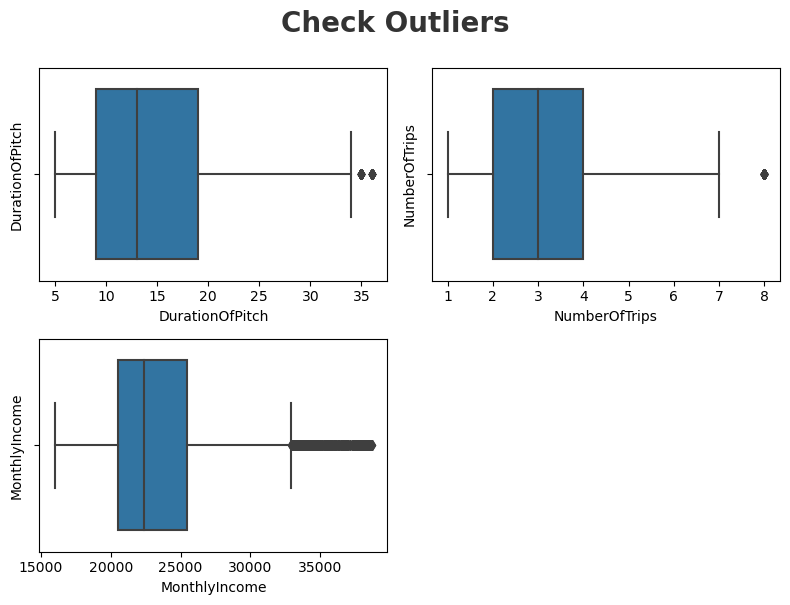

In [135]:
plt.figure(figsize=(8, 6))
plt.suptitle('Check Outliers', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for i, col in enumerate(features):
    plt.subplot(2, 2, i+1)  
    sns.boxplot(x=df_prep[col])
    plt.ylabel(col)
plt.tight_layout()
plt.show()

## Feature Engineering

In [136]:
df_prep = df.copy()

### Feature Encoding

In [137]:
df_prep = df_prep[df_prep['Occupation']!='Free Lancer']

# view dimension size of data before encoding
print(f'Dimensi data sebelum encoding adalah {df_prep.shape[0]} baris dan {df_prep.shape[1]} kolom')

# label encoding
df_prep['Gender'] = df_prep['Gender'].map({'Female':0, 'Male':1})
df_prep['ProductPitched'] = df_prep['ProductPitched'].map({'Basic':0, 'Standard':1, 'Deluxe':2,
                                                           'Super Deluxe':3, 'King':4})
df_prep['Designation'] = df_prep['Designation'].map({'Manager':0, 'Senior Manager':1, 'Executive':2,
                                                     'AVP':3, 'VP':4})

# one hot encoding
for col in ['TypeofContact', 'Occupation', 'MaritalStatus']:
    onehots = pd.get_dummies(df_prep[col], prefix=col,drop_first=True) #menggunakan drop first = True untuk mengurangi dimensi
    df_prep = pd.concat([df_prep, onehots], axis=1)
    df_prep.drop(columns=col, axis=1, inplace=True)
    
# view dimension size of data before encoding
print(f'Dimensi data setelah encoding adalah {df_prep.shape[0]} baris dan {df_prep.shape[1]} kolom')

Dimensi data sebelum encoding adalah 4861 baris dan 20 kolom
Dimensi data setelah encoding adalah 4861 baris dan 22 kolom


In [138]:
df_prep.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'CityTier', 'DurationOfPitch',
       'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups',
       'ProductPitched', 'PreferredPropertyStar', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting',
       'Designation', 'MonthlyIncome', 'TypeofContact_Self Enquiry',
       'Occupation_Salaried', 'Occupation_Small Business',
       'MaritalStatus_Married', 'MaritalStatus_Unmarried'],
      dtype='object')

### Feature Extraction

In [139]:
df_corr = df_prep.corr().iloc[1:,1:]
df_corr = df_corr.apply(lambda x: round(x, 3))
dfcorr = []
for idx in df_corr.index:
    for col in df_corr.columns:
        dfcorr.append([idx, col])
        if (np.abs(df_corr.loc[idx, col]) > 0.5) and (idx != col) and [col, idx] not in dfcorr:
            print(f'{idx} with {col} has correlation : {df_corr.loc[idx, col]}')

NumberOfPersonVisiting with NumberOfChildrenVisiting has correlation : 0.596
ProductPitched with MonthlyIncome has correlation : 0.642
Occupation_Salaried with Occupation_Small Business has correlation : -0.835
MaritalStatus_Married with MaritalStatus_Unmarried has correlation : -0.668


- NumberOfPersonVisiting with NumberOfChildrenVisiting has correlation : 0.596:
Fitur NumberOfPersonVisiting dan NumberOfChildrenVisiting memiliki korelasi positif yang signifikan sebesar 0.596. Ini menunjukkan bahwa jumlah orang yang berkunjung memiliki hubungan yang cukup kuat dengan jumlah anak yang berkunjung.

- ProductPitched with MonthlyIncome has correlation : 0.642:
Fitur ProductPitched dan MonthlyIncome memiliki korelasi positif yang cukup kuat sebesar 0.642. Ini menunjukkan bahwa ada hubungan yang signifikan antara produk yang ditawarkan dengan pendapatan bulanan.

- Occupation_Salaried with Occupation_Small Business has correlation : -0.835:
Fitur Occupation_Salaried dan Occupation_Small Business memiliki korelasi negatif yang kuat sebesar -0.835. Ini menunjukkan adanya hubungan yang kuat ke arah berlawanan antara jenis pekerjaan 'Salaried' dengan 'Small Business'.

- MaritalStatus_Married with MaritalStatus_Unmarried has correlation : -0.668:
Fitur MaritalStatus_Married dan MaritalStatus_Unmarried memiliki korelasi negatif sebesar -0.668. Ini menunjukkan adanya hubungan yang cukup kuat antara status pernikahan 'Married' dengan 'Unmarried'.

In [140]:
df_prep['TotalVisiting'] = df_prep['NumberOfPersonVisiting'] + df_prep['NumberOfChildrenVisiting']
df_prep.drop(columns=['NumberOfPersonVisiting', 'NumberOfChildrenVisiting'], axis=1, inplace=True)

## Split Train & Test Set

In [141]:
X = df_prep.drop(['ProdTaken', 'CustomerID'], axis=1)
y = df_prep['ProdTaken']

In [142]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42) #Splitting 
print(f'Jumlah data latih  terdiri dari {len(X_train)} baris')
print(f'Jumlah class 0 : {sum(y_train==0)}')
print(f'Jumlah class 1 : {sum(y_train==1)}\n')

print(f'Jumlah data uji terdiri dari {len(X_test)} baris')
print(f'Jumlah class 0 : {sum(y_test==0)}')
print(f'Jumlah class 1 : {sum(y_test==1)}\n')

Jumlah data latih  terdiri dari 3402 baris
Jumlah class 0 : 2743
Jumlah class 1 : 659

Jumlah data uji terdiri dari 1459 baris
Jumlah class 0 : 1203
Jumlah class 1 : 256



In [143]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3402, 19) (1459, 19) (3402,) (1459,)


### Feature Transformation

In [144]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
# scaling using normalization
scaler = MinMaxScaler()
scaler.fit(X_train['Age'].values.reshape(-1, 1))
X_train['Age'] = scaler.transform(X_train['Age'].values.reshape(-1, 1))
X_test['Age'] = scaler.transform(X_test['Age'].values.reshape(-1, 1))

# scaling using standardization
scaler = StandardScaler()
scaler.fit(X_train['DurationOfPitch'].values.reshape(-1, 1))
X_train['DurationOfPitch'] = scaler.transform(X_train['DurationOfPitch'].values.reshape(-1, 1))
X_test['DurationOfPitch'] = scaler.transform(X_test['DurationOfPitch'].values.reshape(-1, 1))

scaler.fit(X_train['MonthlyIncome'].values.reshape(-1, 1))
X_train['MonthlyIncome'] = scaler.transform(X_train['MonthlyIncome'].values.reshape(-1, 1))
X_test['MonthlyIncome'] = scaler.transform(X_test['MonthlyIncome'].values.reshape(-1, 1))

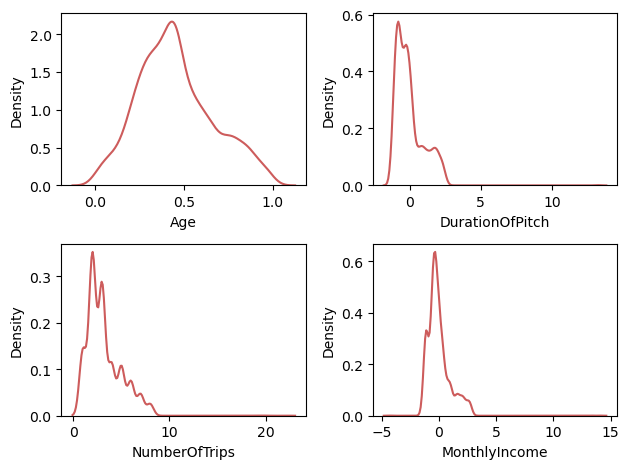

In [145]:
# Plot KDE untuk setiap kolom numerik setelah scaling
for i, col in enumerate(['Age', 'DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome']):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(x=X_train[col], color='indianred')
    plt.xlabel(col)
    
plt.tight_layout()
plt.show()

In [146]:
X_train[['Age', 'DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome']].describe()

,Age,DurationOfPitch,NumberOfTrips,MonthlyIncome
count,3402.000000,3.402000e+03,3402.000000,3.402000e+03
mean,0.453921,1.253162e-17,3.214286,1.905850e-16
std,0.211614,1.000147e+00,1.814119,1.000147e+00
min,0.000000,-1.229457e+00,1.000000,-4.215251e+00
25%,0.302326,-7.553854e-01,2.000000,-5.601319e-01
50%,0.441860,-2.813143e-01,3.000000,-2.264554e-01
75%,0.581395,4.297925e-01,4.000000,3.445737e-01
max,1.000000,1.322971e+01,22.000000,1.403638e+01


- Age:
Rentang usia yang telah dinormalisasi berkisar dari 0 hingga 1, dengan rata-rata sekitar 0.45 dan standar deviasi sekitar 0.21. Nilai minimum adalah 0 (nilai minimum setelah normalisasi), sedangkan nilai maksimum adalah 1 (nilai maksimum setelah normalisasi). Data telah diperkecil agar berada pada skala 0 hingga 1.

- DurationOfPitch:
Fitur ini telah distandardisasi, dengan rata-rata mendekati nol (-1.25e-17 dalam notasi ilmiah yang hampir mendekati 0) dan standar deviasi sekitar 1. Rentang nilai telah berubah menjadi lebih kecil dan tersebar di sekitar nilai rata-rata sebesar 0.

- NumberOfTrips:
Rentang jumlah perjalanan tampak normal, tanpa pengolahan khusus. Kuartil pertama (25%) berada pada 2, median (50%) pada 3, dan kuartil ketiga (75%) pada 4. Nilai maksimum adalah 22.

- MonthlyIncome:
Data penghasilan bulanan telah distandardisasi, dengan rentang nilai yang lebih kecil dan tersebar di sekitar nilai rata-rata sebesar 0. Standar deviasi sekitar 1, menunjukkan distribusi data yang berbeda dari rata-rata.

### Feature Selection

In [147]:
from sklearn.feature_selection import VarianceThreshold

# Inisialisasi dan fitting VarianceThreshold
vars = VarianceThreshold(0.2)
vars.fit(X_train)

# Transformasi data train dan test menggunakan VarianceThreshold
X_train_fs = pd.DataFrame(vars.transform(X_train), columns=vars.get_feature_names_out())
X_test_fs = pd.DataFrame(vars.transform(X_test), columns=vars.get_feature_names_out())

In [148]:
X_train_fs.columns

Index(['CityTier', 'DurationOfPitch', 'Gender', 'NumberOfFollowups',
       'ProductPitched', 'PreferredPropertyStar', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'Designation', 'MonthlyIncome',
       'TypeofContact_Self Enquiry', 'Occupation_Salaried',
       'Occupation_Small Business', 'MaritalStatus_Married',
       'MaritalStatus_Unmarried', 'TotalVisiting'],
      dtype='object')

In [149]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2

num_cols = ['DurationOfPitch', 'NumberOfFollowups', 'NumberOfTrips', 'MonthlyIncome', 'TotalVisiting']

classif = SelectKBest(f_classif, k=4)
classif.fit(X_train_fs[num_cols], y_train)

X_train_fnum = pd.DataFrame(classif.transform(X_train_fs[num_cols]), columns=classif.get_support(indices=True))
X_test_fnum = pd.DataFrame(classif.transform(X_test_fs[num_cols]), columns=classif.get_support(indices=True))


In [150]:
cat_cols = ['CityTier','Gender','ProductPitched','PreferredPropertyStar','Passport','PitchSatisfactionScore','OwnCar','Designation',
 'TypeofContact_Self Enquiry','Occupation_Salaried','Occupation_Small Business','MaritalStatus_Married','MaritalStatus_Unmarried',]

chi2 = SelectKBest(chi2,k=8)
chi2.fit(X_train_fs[cat_cols],y_train)
X_train_chi2 = pd.DataFrame(chi2.transform(X_train_fs[cat_cols]),columns=chi2.get_feature_names_out())
X_test_chi2 = pd.DataFrame(chi2.transform(X_test_fs[cat_cols]),columns=chi2.get_feature_names_out())

In [151]:
all_coll = classif.get_feature_names_out().tolist() + chi2.get_feature_names_out().tolist()
X_train = X_train[all_coll]
X_test = X_test[all_coll]

print(f'Feature hasil seleksi adalah : {all_coll}')

Feature hasil seleksi adalah : ['DurationOfPitch', 'NumberOfFollowups', 'NumberOfTrips', 'MonthlyIncome', 'CityTier', 'ProductPitched', 'PreferredPropertyStar', 'Passport', 'PitchSatisfactionScore', 'Designation', 'MaritalStatus_Married', 'MaritalStatus_Unmarried']


## Handling Imbalance Data

In [152]:
from imblearn.over_sampling import SMOTE

print('Jumlah data latih sebelum SMOTE terdiri dari', len(X_train), 'baris')
print('Jumlah class 0:', sum(y_train == 0))  
print('Jumlah class 1:', sum(y_train == 1), '\n') 

# Lakukan resampling hanya pada data latih
smote = SMOTE(random_state = 42, sampling_strategy = 1.0)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(f'Jumlah data latih setelah SMOTE terdiri dari {len(X_train_resampled)} baris')
print(f'Jumlah class 0: {sum(y_train_resampled==0)}')
print(f'Jumlah class 1: {sum(y_train_resampled==1)}\n')

# Pastikan untuk tetap menggunakan data uji yang belum diubah
print(f'Jumlah data uji: {len(X_test)}')

Jumlah data latih sebelum SMOTE terdiri dari 3402 baris
Jumlah class 0: 2743
Jumlah class 1: 659 

Jumlah data latih setelah SMOTE terdiri dari 5486 baris
Jumlah class 0: 2743
Jumlah class 1: 2743

Jumlah data uji: 1459


Pisahkan Train & Test Data

In [153]:
X_train.to_csv('Travel_Prep_train.csv', index=False)
X_test.to_csv('Travel_Prep_test.csv', index=False)

# Machine Learning Modelling & Evaluation

## Modelling

In [154]:
from sklearn.metrics import confusion_matrix
def plotting_confusion_matrix(model, X_test, y_test, title):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots(1, 1, figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', annot_kws={"fontsize":12}, ax=ax)

    # setting title and axis labels
    plt.tick_params(axis='both', which='major', labelsize=12)
    ax.set_xlabel('Predicted Labels', fontsize=12)
    ax.set_ylabel('True Labels', fontsize=12)
    ax.set_title('Confusion Matrix ' + title, fontsize=14)
    ax.xaxis.set_ticklabels(['Not Taken', 'Taken'])
    ax.yaxis.set_ticklabels(['Not Taken', 'Taken'])
    plt.show()
    
    print(f'Dari model {title} didapatkan bahwa:')
    print(f'- Jumlah TP (True Positive) = {cm[1][1]}')
    print(f'- Jumlah TN (True Negative) = {cm[0][0]}')
    print(f'- Jumlah FP (False Positive) = {cm[0][1]}')
    print(f'- Jumlah FN (False Negative) = {cm[1][0]}')

### Random Forest

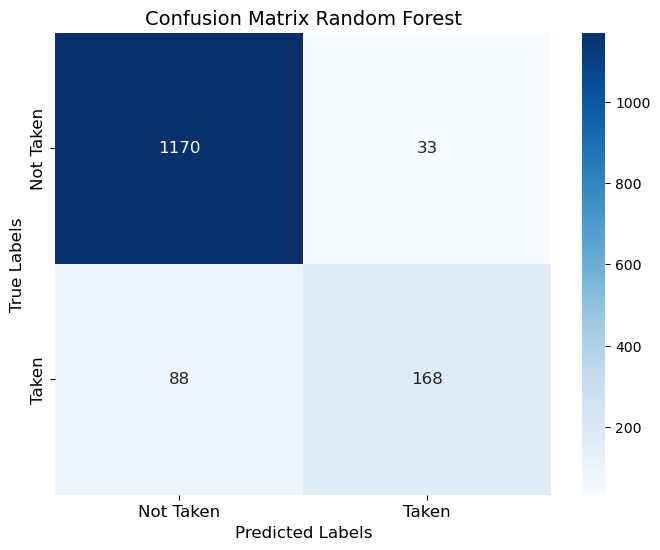

Dari model Random Forest didapatkan bahwa:
- Jumlah TP (True Positive) = 168
- Jumlah TN (True Negative) = 1170
- Jumlah FP (False Positive) = 33
- Jumlah FN (False Negative) = 88


In [155]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

plotting_confusion_matrix(rf, X_test, y_test, title='Random Forest')

### Decision Tree

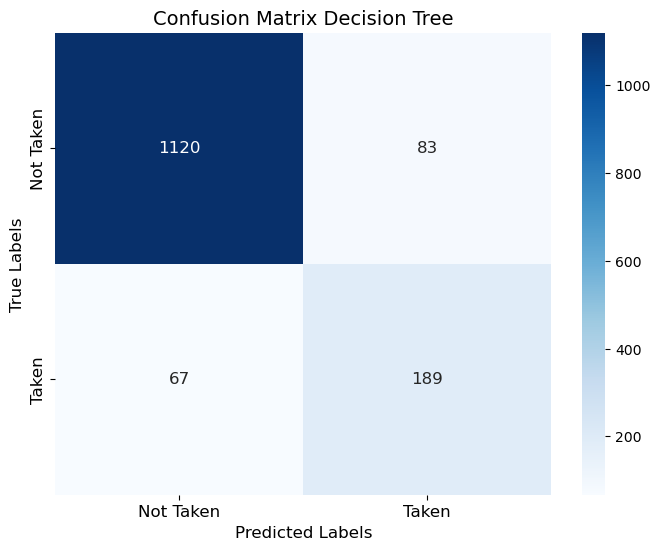

Dari model Decision Tree didapatkan bahwa:
- Jumlah TP (True Positive) = 189
- Jumlah TN (True Negative) = 1120
- Jumlah FP (False Positive) = 83
- Jumlah FN (False Negative) = 67


In [156]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

plotting_confusion_matrix(dt, X_test, y_test, title='Decision Tree')

### Logistic Regression

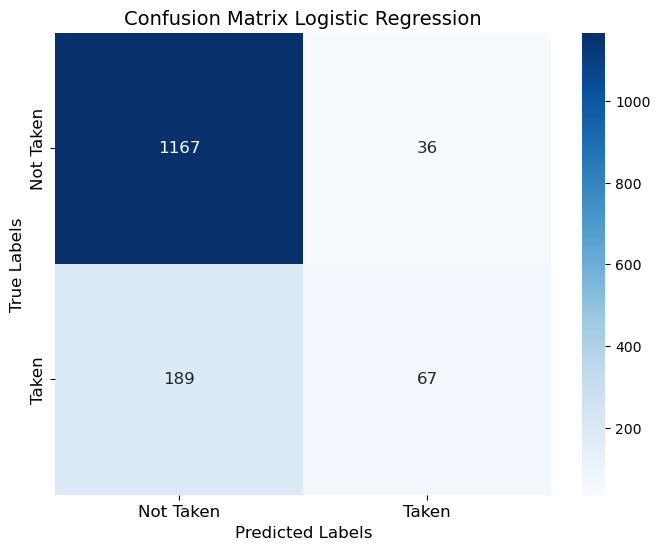

Dari model Logistic Regression didapatkan bahwa:
- Jumlah TP (True Positive) = 67
- Jumlah TN (True Negative) = 1167
- Jumlah FP (False Positive) = 36
- Jumlah FN (False Negative) = 189


In [157]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

plotting_confusion_matrix(lr, X_test, y_test, title='Logistic Regression')

### AdaBoost

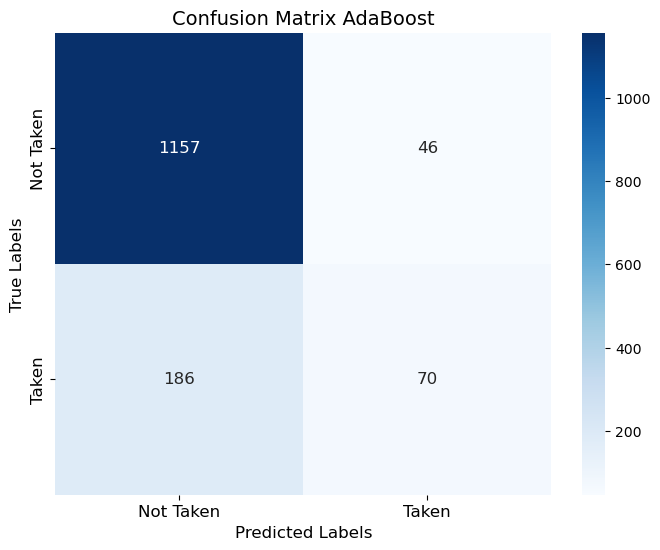

Dari model AdaBoost didapatkan bahwa:
- Jumlah TP (True Positive) = 70
- Jumlah TN (True Negative) = 1157
- Jumlah FP (False Positive) = 46
- Jumlah FN (False Negative) = 186


In [158]:
from sklearn.ensemble import AdaBoostClassifier

adb = AdaBoostClassifier(random_state=42)
adb.fit(X_train, y_train)

plotting_confusion_matrix(adb, X_test, y_test, title='AdaBoost')

### XGBoost

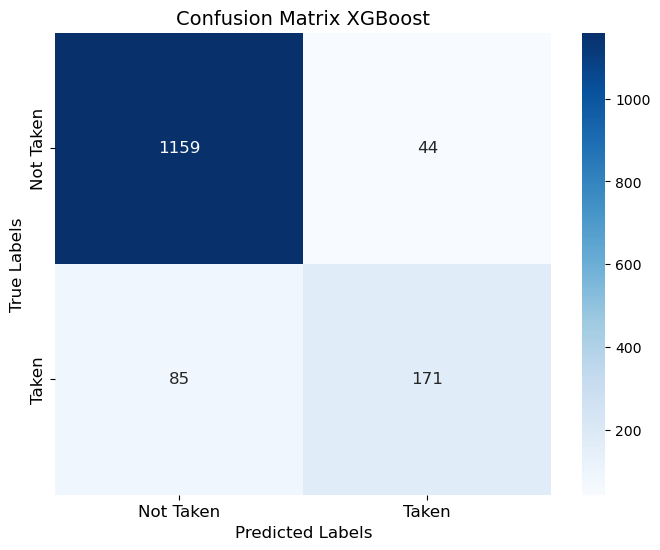

Dari model XGBoost didapatkan bahwa:
- Jumlah TP (True Positive) = 171
- Jumlah TN (True Negative) = 1159
- Jumlah FP (False Positive) = 44
- Jumlah FN (False Negative) = 85


In [159]:
import xgboost as xgb

xgbo = xgb.XGBClassifier(random_state=42)
xgbo.fit(X_train, y_train)

plotting_confusion_matrix(xgbo, X_test, y_test, title='XGBoost')

### Model Evaluation

In [160]:
def eval_classification(model, X_train, y_train, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    accuracy = round(accuracy_score(y_test, y_pred), 4)
    precision = round(precision_score(y_test, y_pred), 4)
    recall = round(recall_score(y_test, y_pred), 4)
    f1 = round(f1_score(y_test, y_pred), 4)
    auc_test = round(roc_auc_score(y_test, y_pred_proba[:, 1]), 4)
    auc_train = round(roc_auc_score(y_train, y_pred_proba_train[:, 1]), 4)   
    
    return accuracy, precision, recall, f1, auc_test, auc_train
def score_all_classification(model_list, X_train, y_train, X_test, y_test):
    model_name = ['Random Forest', 'Decision Tree', 'Logistic Regression', 'AdaBoost', 'XGBoost']
    eval_cols = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC (Test)', 'AUC (Train)']
    
    eval_list = []
    for name, model in zip(model_name, model_list):
        result = eval_classification(model, X_train, y_train, X_test, y_test)
        eval_list.append([name] + list(result))
    df_model = pd.DataFrame(data=eval_list, columns=eval_cols)
    
    return df_model

In [161]:
model_list_base = [rf, dt, lr, adb, xgbo]

# Kemudian panggil fungsi score_all_classification dengan model_list_base yang telah didefinisikan
df_results = score_all_classification(model_list_base, X_train, y_train, X_test, y_test)
df_results

,Model,Accuracy,Precision,Recall,F1 Score,AUC (Test),AUC (Train)
0,Random Forest,0.9171,0.8358,0.6562,0.7352,0.9410,1.0000
1,Decision Tree,0.8972,0.6949,0.7383,0.7159,0.8346,1.0000
2,Logistic Regression,0.8458,0.6505,0.2617,0.3733,0.7964,0.8042
3,AdaBoost,0.8410,0.6034,0.2734,0.3763,0.7967,0.8283
4,XGBoost,0.9116,0.7953,0.6680,0.7261,0.9146,1.0000


Evaluasi Metrics

- Random Forest:
Keunggulan: Tertinggi dalam Accuracy (0.9171), Precision (0.8358), F1-Score (0.7352), dan AUC (0.9410).
Kekurangan: Recall (0.6562) sedikit lebih rendah dari Decision Tree.
- Decision Tree:
Keunggulan: Recall (0.7383) tertinggi di antara model lain.
Kekurangan: Memiliki Precision (0.6949) lebih rendah dari model Random Forest dan XGBoost.
- Logistic Regression dan AdaBoost:
Memiliki Recall dan Precision yang lebih rendah dibandingkan model lain.
- XGBoost:
Menunjukkan performa yang seimbang dengan nilai tinggi di hampir semua metrik evaluasi.

## Tuning Hyperparameters

In [162]:
list_hyperparameters = [
    { # Random Forest
        'n_estimators' : [int(x) for x in np.linspace(50, 1000, 50)], 
        'max_features' : ['auto', 'sqrt', 'log2'],
        'max_depth' : [int(x) for x in np.linspace(10, 100, 10)],
        'criterion' : ['gini','entropy'],
        'min_samples_split' : [int(x) for x in np.linspace(2, 10, 5)],
        'min_samples_leaf' : [int(x) for x in np.linspace(1, 10, 5)],
        'class_weight' : ['balanced', 'balanced_subsample'],
        'oob_score' : [True, False]
    },
    { # Decision Tree
        'max_depth' : [int(x) for x in np.linspace(10, 100, 10)],
        'min_samples_split' : [int(x) for x in np.linspace(2, 10, 5)],
        'min_samples_leaf' : [int(x) for x in np.linspace(1, 10, 5)],
        'max_features' : ['auto', 'sqrt']
    }, 
    { # Logistic Regression
        'penalty': ['l2','l1','elasticnet'],
        'C': [float(x) for x in np.logspace(-3, 3, 20)]
    },
    { # Adaboost
       'n_estimators' : [int(x) for x in np.linspace(100, 2000, 1000)],
       'learning_rate' : [float(x) for x in np.linspace(0.001, 0.1, 100)],
       'algorithm' : ['SAMME', 'SAMME.R']
    },
    { # XGBoost
        'max_depth' : [int(x) for x in np.linspace(10, 50, 10)],
        'min_child_weight' : [int(x) for x in np.linspace(1, 10, 11)],
        'gamma' : [float(x) for x in np.linspace(0, 1, 11)],
        'tree_method' : ['auto', 'exact', 'approx', 'hist'],
        'colsample_bytree' : [float(x) for x in np.linspace(0, 1, 11)],
        'learning_rate' : [float(x) for x in np.linspace(0, 1, 100)],
        'reg_lambda' : [float(x) for x in np.linspace(0, 1, 11)],
        'reg_alpha' : [float(x) for x in np.linspace(0, 1, 11)]
    }
]

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.best_estimator_.get_params()[key])
        
def eval_after_hyperparameter_tuning(model, X_train, y_train, X_test, y_test):
    eval_new = eval_classification(model, X_train, y_train, X_test, y_test)
    eval_score = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC (Test)', 'AUC (Train)']
    for score, e in zip(eval_score, eval_new):
        print(score + ': ' + str(e))

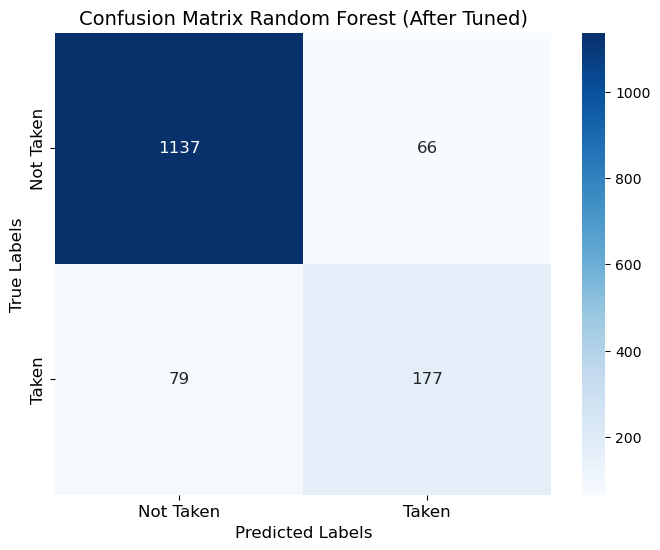

Dari model Random Forest (After Tuned) didapatkan bahwa:
- Jumlah TP (True Positive) = 177
- Jumlah TN (True Negative) = 1137
- Jumlah FP (False Positive) = 66
- Jumlah FN (False Negative) = 79
Best n_estimators: 709
Best max_features: log2
Best max_depth: 50
Best criterion: entropy
Best min_samples_split: 6
Best min_samples_leaf: 1
Best class_weight: balanced
Best oob_score: True
Accuracy: 0.9006
Precision: 0.7284
Recall: 0.6914
F1 Score: 0.7094
AUC (Test): 0.9289
AUC (Train): 0.9997


In [163]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
rf_tuned = RandomForestClassifier(random_state=42)
rf_tuned = RandomizedSearchCV(rf, list_hyperparameters[0], cv=5, scoring='accuracy', random_state=42)
rf_tuned.fit(X_train, y_train)

plotting_confusion_matrix(rf_tuned, X_test, y_test, title='Random Forest (After Tuned)')
show_best_hyperparameter(rf_tuned, list_hyperparameters[0])
eval_after_hyperparameter_tuning(rf_tuned, X_train, y_train, X_test, y_test)

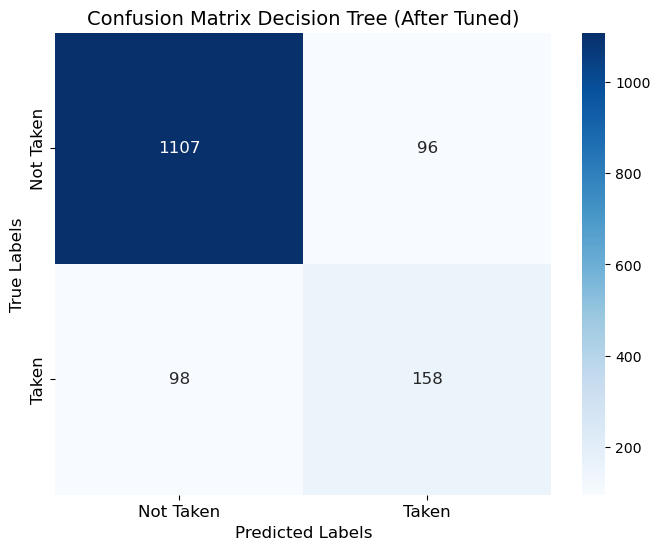

Dari model Decision Tree (After Tuned) didapatkan bahwa:
- Jumlah TP (True Positive) = 158
- Jumlah TN (True Negative) = 1107
- Jumlah FP (False Positive) = 96
- Jumlah FN (False Negative) = 98
Best max_depth: 80
Best min_samples_split: 6
Best min_samples_leaf: 1
Best max_features: sqrt
Accuracy: 0.867
Precision: 0.622
Recall: 0.6172
F1 Score: 0.6196
AUC (Test): 0.8284
AUC (Train): 0.9909


In [164]:
dt_tuned = DecisionTreeClassifier(random_state=42)
dt_tuned = RandomizedSearchCV(dt, list_hyperparameters[1], cv=5, scoring='accuracy', random_state=42)
dt_tuned.fit(X_train, y_train)

plotting_confusion_matrix(dt_tuned, X_test, y_test, title='Decision Tree (After Tuned)')
show_best_hyperparameter(dt_tuned, list_hyperparameters[1])
eval_after_hyperparameter_tuning(dt_tuned, X_train, y_train, X_test, y_test)

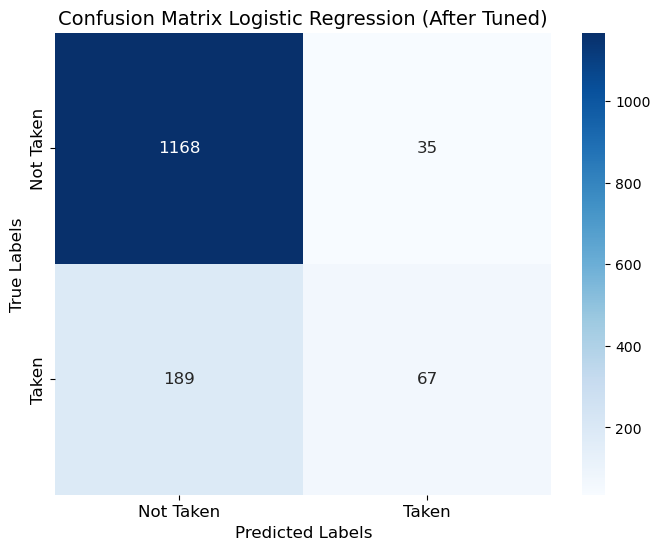

Dari model Logistic Regression (After Tuned) didapatkan bahwa:
- Jumlah TP (True Positive) = 67
- Jumlah TN (True Negative) = 1168
- Jumlah FP (False Positive) = 35
- Jumlah FN (False Negative) = 189
Best penalty: l2
Best C: 54.555947811685144
Accuracy: 0.8465
Precision: 0.6569
Recall: 0.2617
F1 Score: 0.3743
AUC (Test): 0.7961
AUC (Train): 0.8041


In [165]:
lr_tuned = LogisticRegression(random_state=42)
lr_tuned = RandomizedSearchCV(lr, list_hyperparameters[2], cv=5, scoring='accuracy', random_state=42)
lr_tuned.fit(X_train, y_train)

plotting_confusion_matrix(lr_tuned, X_test, y_test, title='Logistic Regression (After Tuned)')
show_best_hyperparameter(lr_tuned, list_hyperparameters[2])
eval_after_hyperparameter_tuning(lr_tuned, X_train, y_train, X_test, y_test)

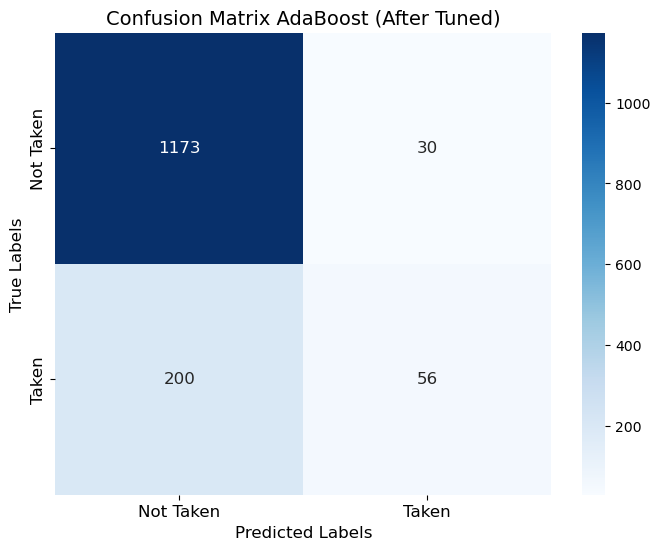

Dari model AdaBoost (After Tuned) didapatkan bahwa:
- Jumlah TP (True Positive) = 56
- Jumlah TN (True Negative) = 1173
- Jumlah FP (False Positive) = 30
- Jumlah FN (False Negative) = 200
Best n_estimators: 1047
Best learning_rate: 0.08800000000000001
Best algorithm: SAMME
Accuracy: 0.8424
Precision: 0.6512
Recall: 0.2188
F1 Score: 0.3275
AUC (Test): 0.8005
AUC (Train): 0.8191


In [166]:
adb_tuned = AdaBoostClassifier(random_state=42)
adb_tuned = RandomizedSearchCV(adb, list_hyperparameters[3], cv=5, scoring='accuracy', random_state=42)
adb_tuned.fit(X_train, y_train)

plotting_confusion_matrix(adb_tuned, X_test, y_test, title='AdaBoost (After Tuned)')
show_best_hyperparameter(adb_tuned, list_hyperparameters[3])
eval_after_hyperparameter_tuning(adb_tuned, X_train, y_train, X_test, y_test)

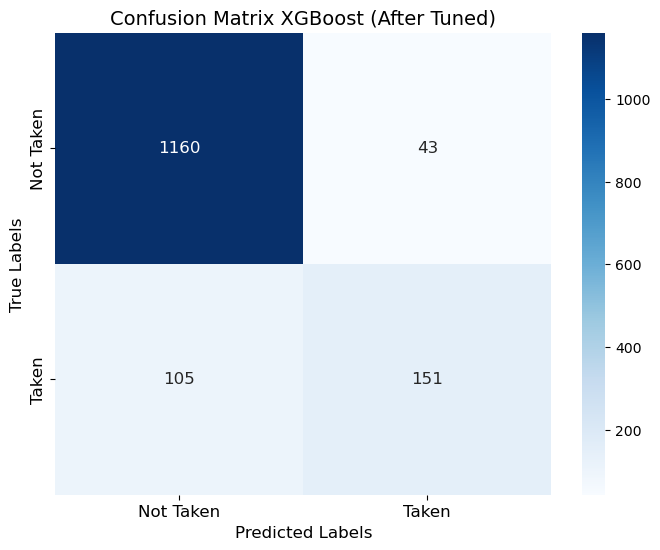

Dari model XGBoost (After Tuned) didapatkan bahwa:
- Jumlah TP (True Positive) = 151
- Jumlah TN (True Negative) = 1160
- Jumlah FP (False Positive) = 43
- Jumlah FN (False Negative) = 105
Best max_depth: 50
Best min_child_weight: 2
Best gamma: 0.1
Best tree_method: auto
Best colsample_bytree: 0.6000000000000001
Best learning_rate: 0.5252525252525253
Best reg_lambda: 0.8
Best reg_alpha: 0.8
Accuracy: 0.8986
Precision: 0.7784
Recall: 0.5898
F1 Score: 0.6711
AUC (Test): 0.9029
AUC (Train): 0.9989


In [167]:
xgb_tuned = AdaBoostClassifier(random_state=42)
xgb_tuned = RandomizedSearchCV(xgbo, list_hyperparameters[4], cv=5, scoring='accuracy', random_state=42)
xgb_tuned.fit(X_train, y_train)

plotting_confusion_matrix(xgb_tuned, X_test, y_test, title='XGBoost (After Tuned)')
show_best_hyperparameter(xgb_tuned, list_hyperparameters[4])
eval_after_hyperparameter_tuning(xgb_tuned, X_train, y_train, X_test, y_test)

In [168]:
model_tuning = [rf_tuned, dt_tuned, lr_tuned,  adb_tuned, xgb_tuned]
score_all_classification(model_tuning, X_train, y_train, X_test, y_test)

,Model,Accuracy,Precision,Recall,F1 Score,AUC (Test),AUC (Train)
0,Random Forest,0.9006,0.7284,0.6914,0.7094,0.9289,0.9997
1,Decision Tree,0.8670,0.6220,0.6172,0.6196,0.8284,0.9909
2,Logistic Regression,0.8465,0.6569,0.2617,0.3743,0.7961,0.8041
3,AdaBoost,0.8424,0.6512,0.2188,0.3275,0.8005,0.8191
4,XGBoost,0.8986,0.7784,0.5898,0.6711,0.9029,0.9989


In [169]:
def check_overfit(model, X_train, X_test, title):
    result = pd.DataFrame({
        'Model': title,
        'accuracy_score_train': [accuracy_score(y_train, model.predict(X_train))],
        'accuracy_score_test': [accuracy_score(y_test, model.predict(X_test))],
        'accuracy_score_cv': [model.best_score_]
    })
    return result

check_overfit(rf_tuned, X_train, X_test, 'Random Forest Classifier')

,Model,accuracy_score_train,accuracy_score_test,accuracy_score_cv
0,Random Forest Classifier,0.992651,0.900617,0.900944


accuracy_score_train memiliki nilai sekitar 99.27%, menunjukkan bahwa model memiliki tingkat akurasi yang tinggi pada data train. Ini menandakan bahwa model secara baik mempelajari pola yang ada dalam data pelatihan.

accuracy_score_test dengan nilai sekitar 90.06% menunjukkan performa model pada data test yang masih baik. Meskipun sedikit lebih rendah dari akurasi pada data train, perbedaan tersebut tidak terlalu signifikan, yang bisa menunjukkan bahwa model tidak mengalami overfitting yang parah.

accuracy_score_cv dengan nilai sekitar 90.09% adalah hasil dari proses cross-validation pada model. Ini merupakan indikasi bahwa performa model tetap baik saat diuji dengan metode cross-validation, menunjukkan konsistensi kinerja pada data yang berbeda-beda.

Model Random Forest Classifier memiliki kinerja yang baik dengan tingkat akurasi yang cukup tinggi pada data test dan konsisten pada data test serta pada evaluasi menggunakan cross-validation. Hal ini mengindikasikan bahwa model tersebut dapat memberikan prediksi yang baik pada data baru yang belum pernah dilihat sebelumnya.

## Feature Importance

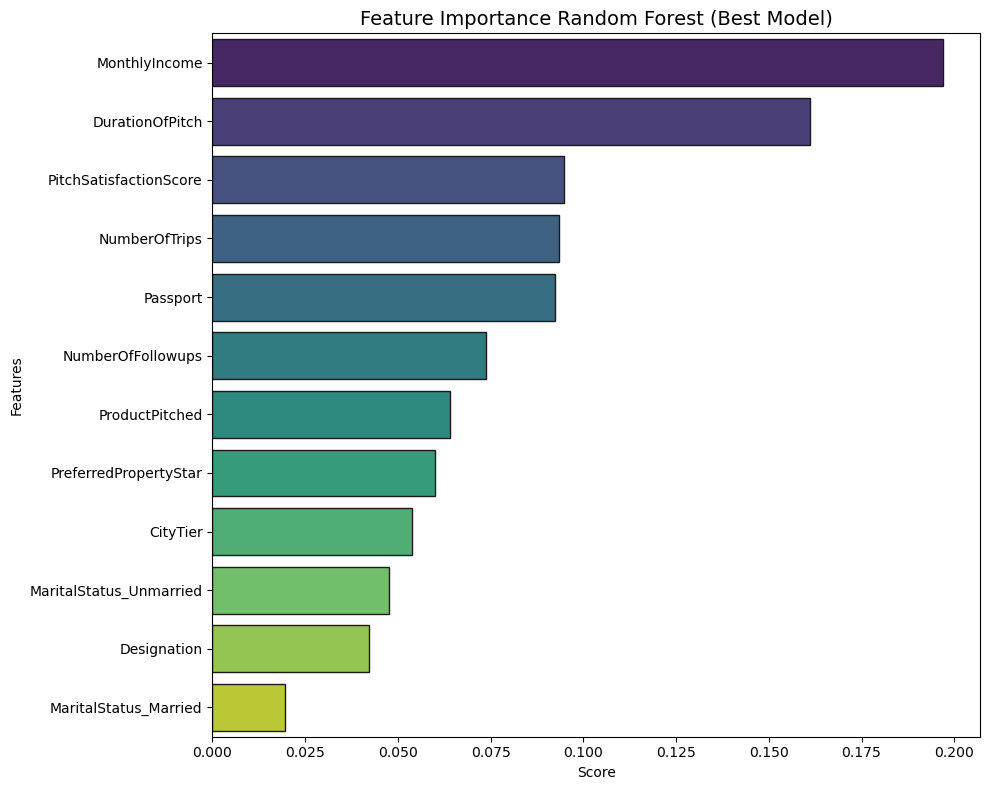

In [170]:
feature_importance_rf = pd.Series(rf_tuned.best_estimator_.feature_importances_, index=X_train.columns)
df_feats = feature_importance_rf.sort_values(ascending=False).to_frame(name='Score').reset_index()

plt.figure(figsize=(10,8))
sns.barplot(data=df_feats, y='index', x='Score', palette='viridis', edgecolor='.1')
plt.xlabel('Score')
plt.ylabel('Features')
plt.title('Feature Importance Random Forest (Best Model)', fontsize=14)
plt.tight_layout()
plt.show()


In [171]:
df_test = X_test.copy()
best_model = rf_tuned.best_estimator_
df_test['ProdTaken'] = y_test
df_test['ProdTaken_Pred'] = best_model.predict(X_test)
df_test['ProdTaken_PredProba'] = best_model.predict_proba(X_test)[:, 1]
df_test.head()

,DurationOfPitch,NumberOfFollowups,NumberOfTrips,MonthlyIncome,CityTier,ProductPitched,PreferredPropertyStar,Passport,PitchSatisfactionScore,Designation,MaritalStatus_Married,MaritalStatus_Unmarried,ProdTaken,ProdTaken_Pred,ProdTaken_PredProba
2211,-0.518350,3.0,7.0,1.820729,3,4,3.0,0,4,4,1,0,0,0,0.028003
3378,-0.992421,4.0,3.0,-0.520378,1,0,4.0,0,3,2,0,1,0,0,0.169948
2678,0.666828,4.0,7.0,-0.456848,1,0,3.0,1,2,2,0,0,1,1,0.722462
2128,-0.044279,3.0,2.0,-1.121118,1,0,5.0,1,3,2,1,0,0,1,0.505906
3838,-0.399832,5.0,2.0,0.896544,1,2,3.0,0,1,0,0,1,0,0,0.057195
